In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.feature_selection import f_classif

# Leitura dos dados
data = pd.read_csv("parkinsons.data")

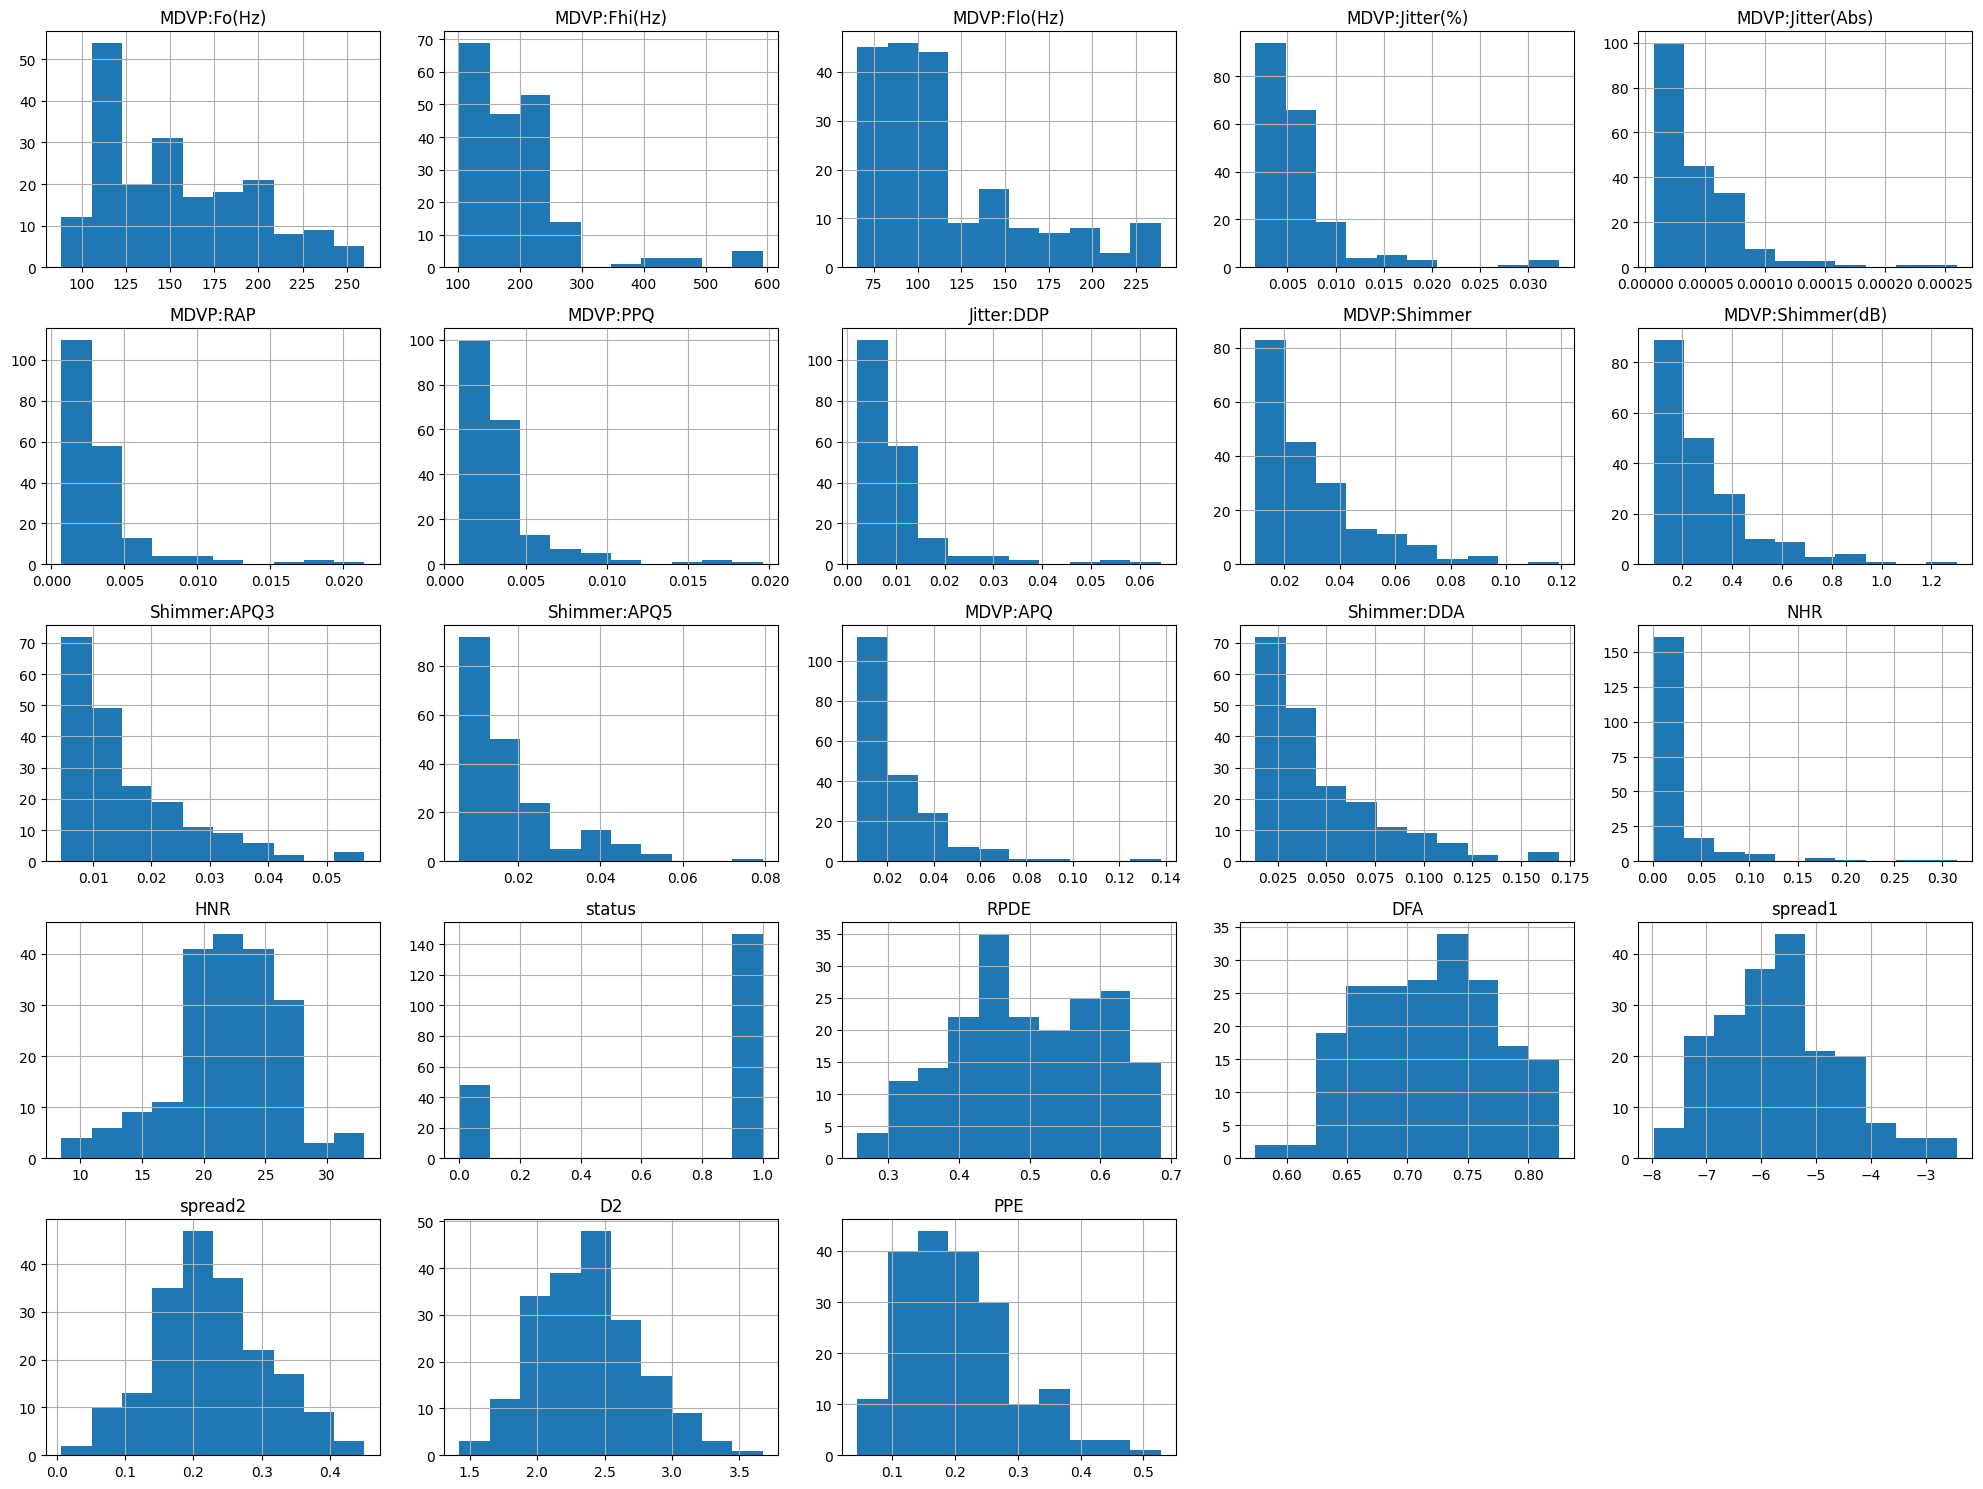

In [2]:
# Distribuição dos dados
data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\2483483660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


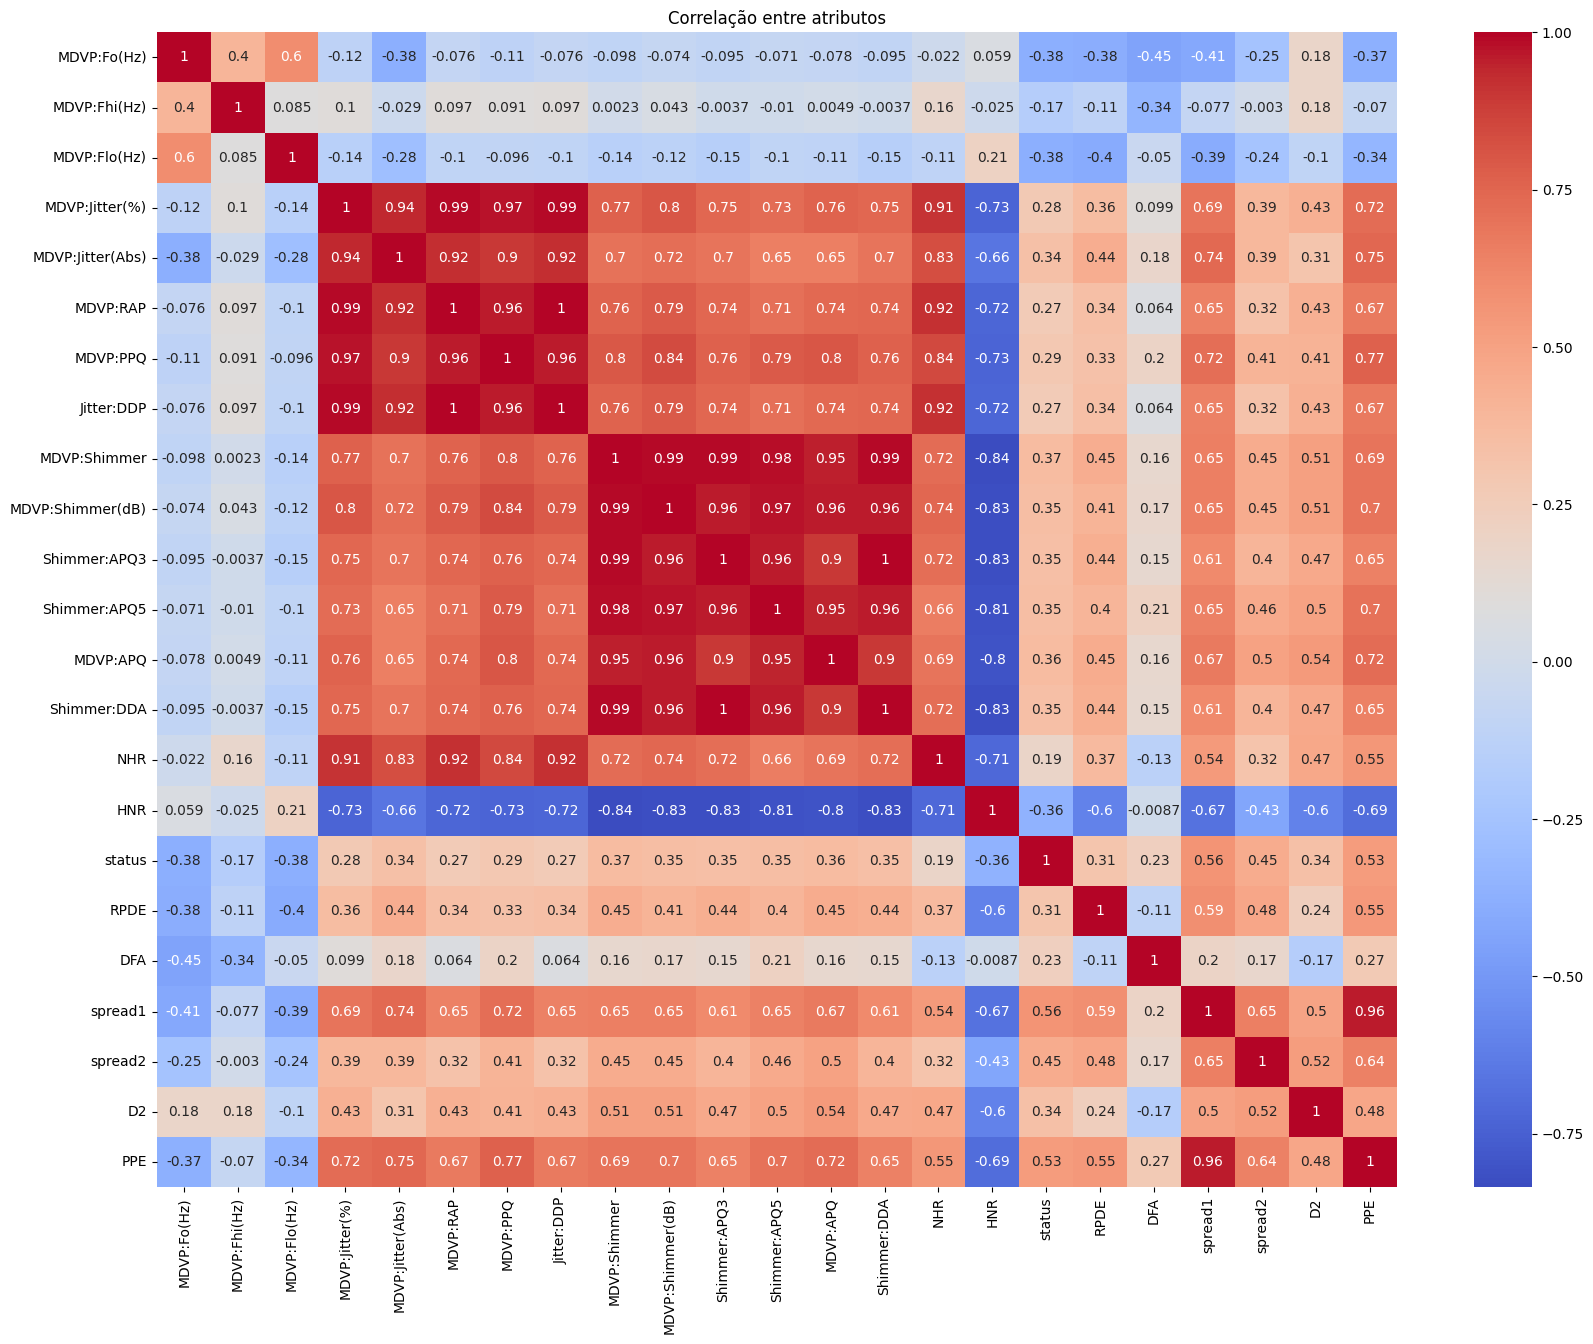

In [3]:
# Correlação entre atributos
corr = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre atributos")
plt.show()

In [4]:
# ANOVA
X = data.drop(columns=["name", "status"])
y = data["status"]
F, pval = f_classif(X, y)
anova = pd.DataFrame({'Atributo': X.columns, 'F': F, 'p-value': pval})
anova.sort_values('p-value', inplace=True)
print(anova)

            Atributo          F       p-value
18           spread1  90.424219  7.909651e-18
21               PPE  75.803195  1.392619e-15
19           spread2  50.343165  2.391729e-11
0        MDVP:Fo(Hz)  33.286577  3.121919e-08
2       MDVP:Flo(Hz)  32.612875  4.197004e-08
8       MDVP:Shimmer  30.122600  1.264702e-07
12          MDVP:APQ  29.536350  1.643238e-07
15               HNR  29.015927  2.074677e-07
11      Shimmer:APQ5  27.145033  4.823575e-07
9   MDVP:Shimmer(dB)  27.065484  5.000743e-07
10      Shimmer:APQ3  26.527120  6.386194e-07
13       Shimmer:DDA  26.525626  6.390539e-07
20                D2  25.265912  1.135925e-06
4   MDVP:Jitter(Abs)  25.001729  1.282252e-06
16              RPDE  20.310049  1.139896e-05
6           MDVP:PPQ  17.548533  4.257767e-05
3     MDVP:Jitter(%)  16.192809  8.209989e-05
5           MDVP:RAP  14.775226  1.643393e-04
7         Jitter:DDP  14.772666  1.645466e-04
17               DFA  10.952901  1.115116e-03
14               NHR   7.183270  7

In [5]:
# Correlação com dcca e rhodcca
dcca_corr, dcca_pval = pearsonr(X.iloc[:, 1], X.iloc[:, 12])
rhodcca_corr, rhodcca_pval = pearsonr(X.iloc[:, 2], X.iloc[:, 13])
print(f"Correlação com DCCA: {dcca_corr:.4f}, p-value: {dcca_pval:.4f}")
print(f"Correlação com RHODCCA: {rhodcca_corr:.4f}, p-value: {rhodcca_pval:.4f}")

Correlação com DCCA: 0.0049, p-value: 0.9454
Correlação com RHODCCA: -0.1507, p-value: 0.0354


In [6]:
import pandas as pd

# Carrega o arquivo CSV em um dataframe do Pandas
df = pd.read_csv('parkinsons.data')

# Separa os pacientes com Parkinson dos pacientes sem Parkinson
parkinsons_df = df[df['status'] == 1]
healthy_df = df[df['status'] == 0]

In [29]:
parkinsons_df


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,phon_R01_S44_2,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,...,0.02518,0.00488,24.412,1,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,phon_R01_S44_3,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,...,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,...,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710


In [7]:
# Métricas estatísticas para pacientes com Parkinson
print(parkinsons_df.describe())

# Métricas estatísticas para pacientes sem Parkinson
print(healthy_df.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   147.000000    147.000000    147.000000      147.000000   
mean    145.180762    188.441463    106.893558        0.006989   
std      32.348050     88.339180     32.274358        0.005240   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    133.776500     80.875500        0.004005   
50%     145.174000    163.335000     99.770000        0.005440   
75%     170.071000    207.160500    129.240000        0.007670   
max     223.361000    588.518000    199.020000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        147.000000  147.000000  147.000000  147.000000    147.000000   
mean           0.000051    0.003757    0.003900    0.011273      0.033658   
std            0.000037    0.003241    0.002998    0.009724      0.019970   
min            0.000010    0.000680    0.000920    0.002040      0.010220   
25%            0.000

In [69]:
# Separa os pacientes com Parkinson dos pacientes sem Parkinson
parkinsons_df = df[df['status'] == 1]
healthy_df = df[df['status'] == 0]
# Separa os pacientes com Parkinson dos pacientes sem Parkinson
desc_parkinsons = parkinsons_df.describe()
desc_no_parkinsons =healthy_df.describe()
desc_parkinsons = desc_parkinsons.loc[['mean', 'std', 'min', 'max']]
desc_no_parkinsons = desc_no_parkinsons.loc[['mean', 'std', 'min', 'max']]
cols = desc_parkinsons.columns
cols


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [56]:
desc_parkinsons_1=desc_parkinsons['MDVP:Fo(Hz)']
desc_parkinsons_2=desc_no_parkinsons['MDVP:Fo(Hz)']

In [58]:
desc_parkinsons_2

mean    181.937771
std      52.731067
min     110.739000
max     260.105000
Name: MDVP:Fo(Hz), dtype: float64

In [59]:
desc_parkinsons_1




mean    145.180762
std      32.348050
min      88.333000
max     223.361000
Name: MDVP:Fo(Hz), dtype: float64

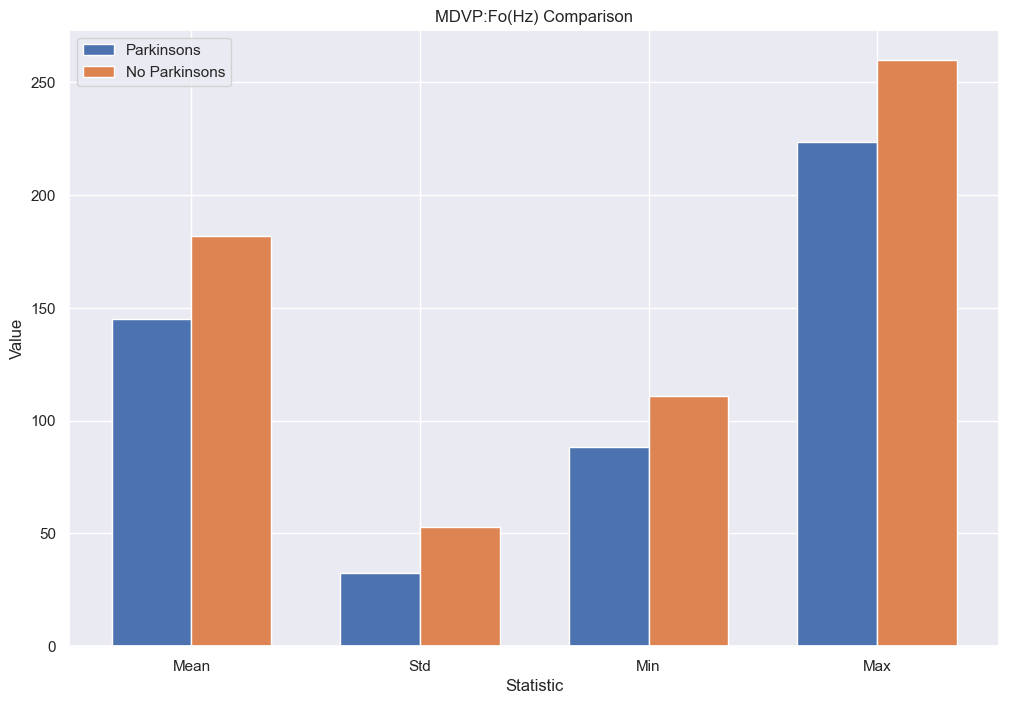

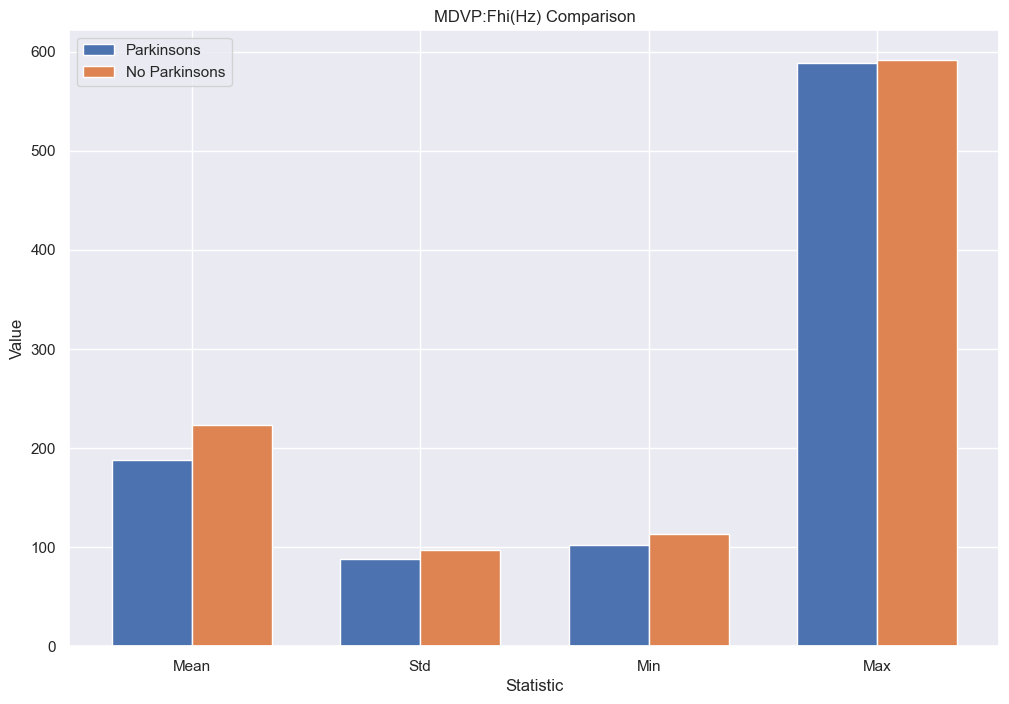

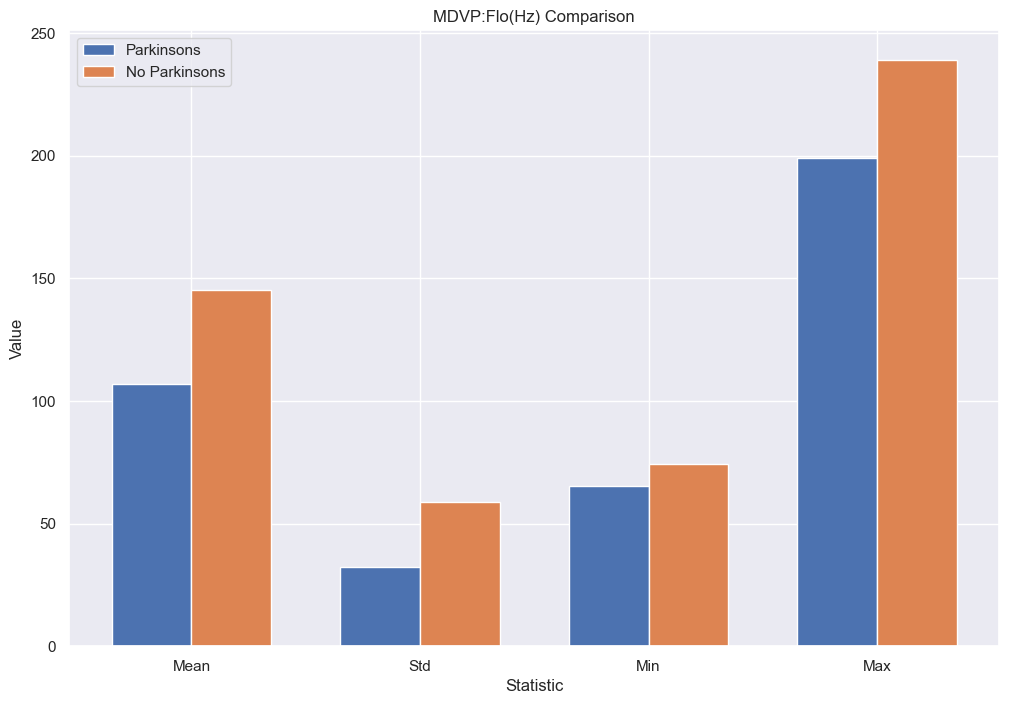

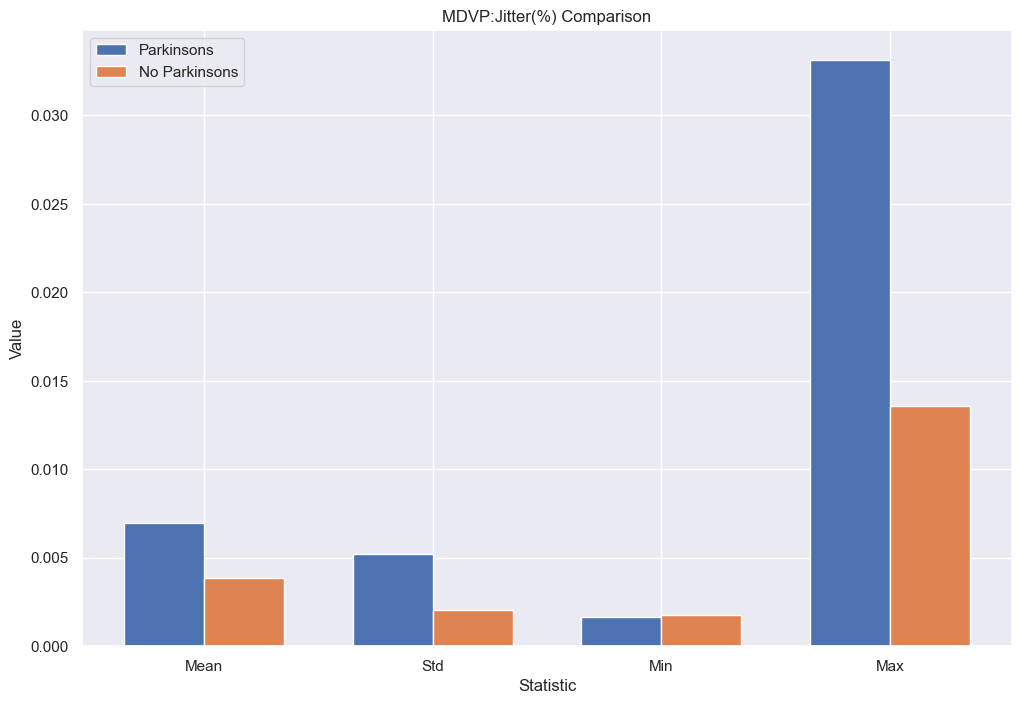

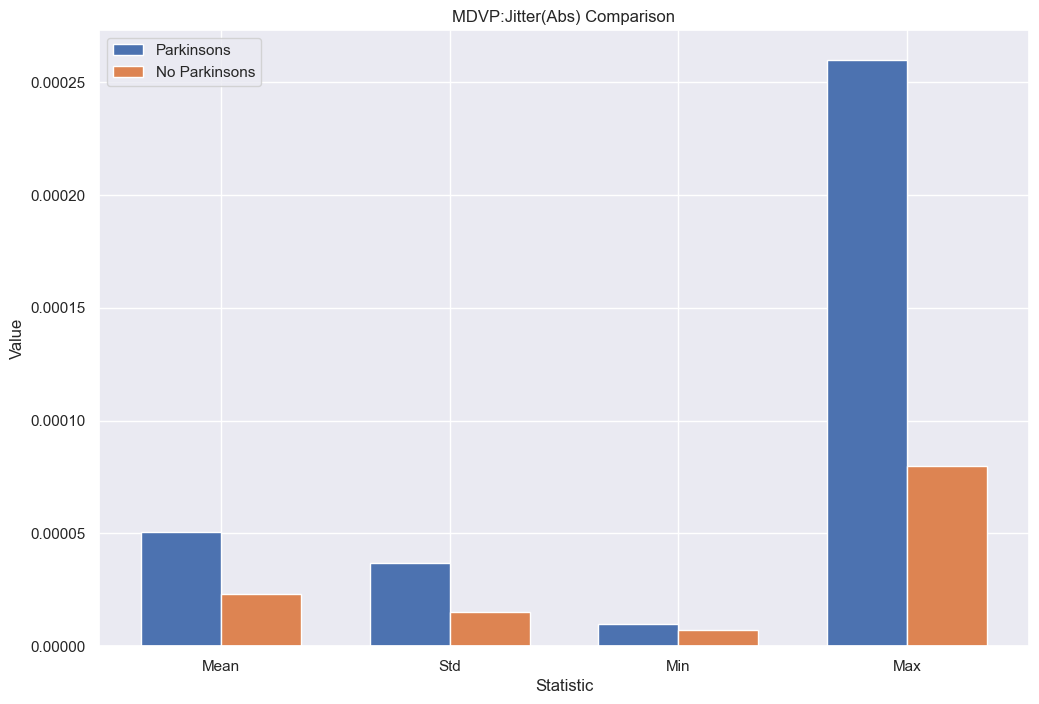

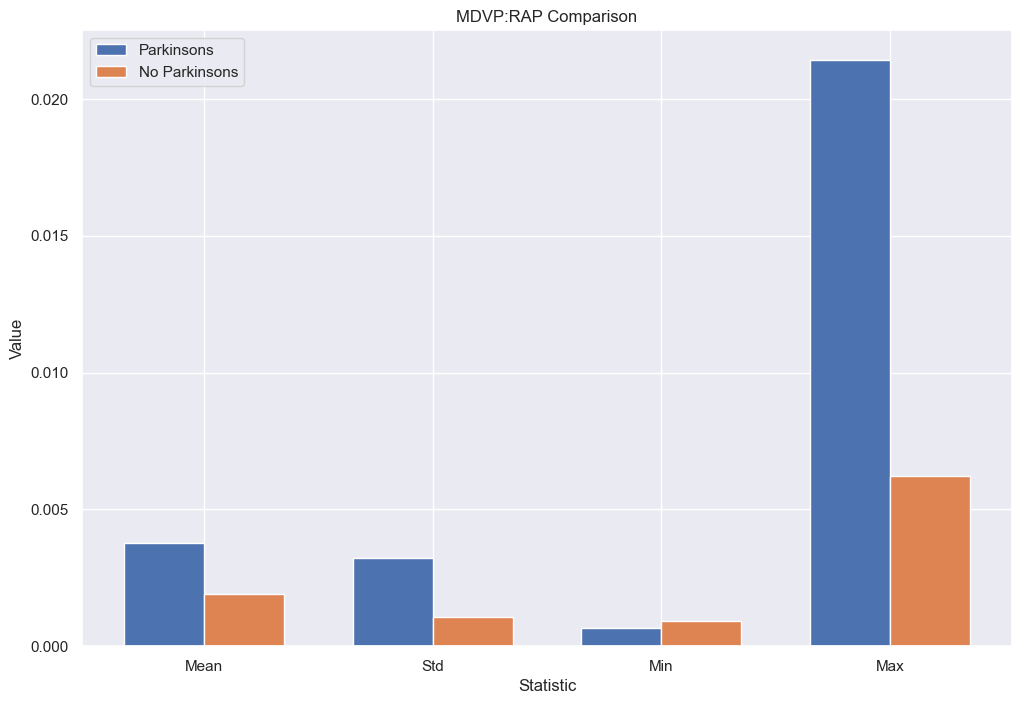

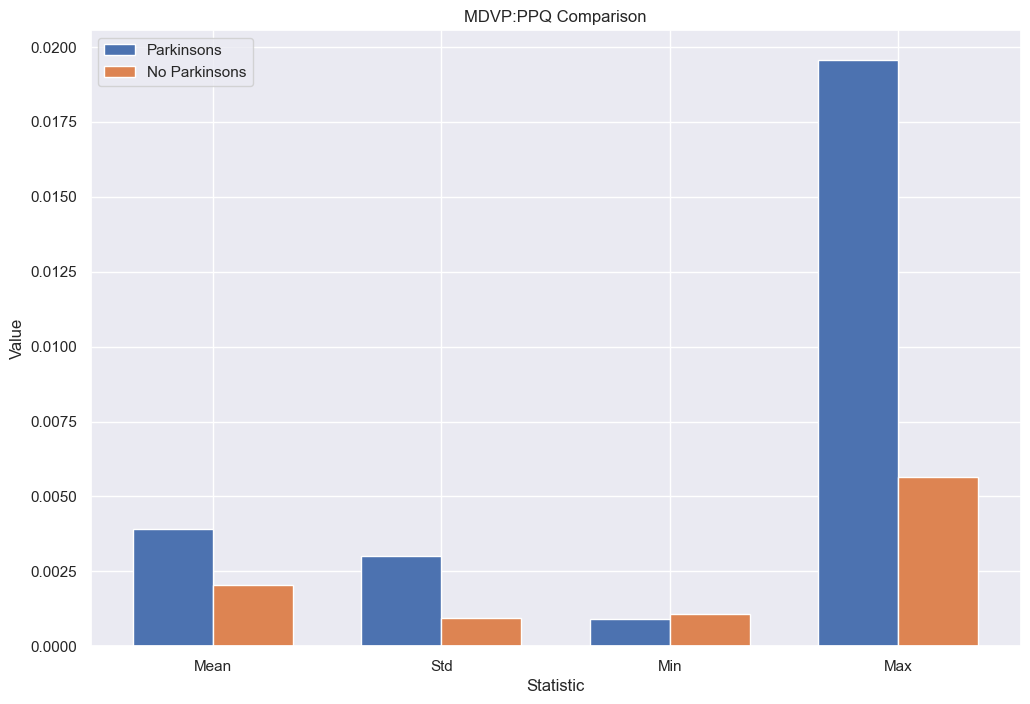

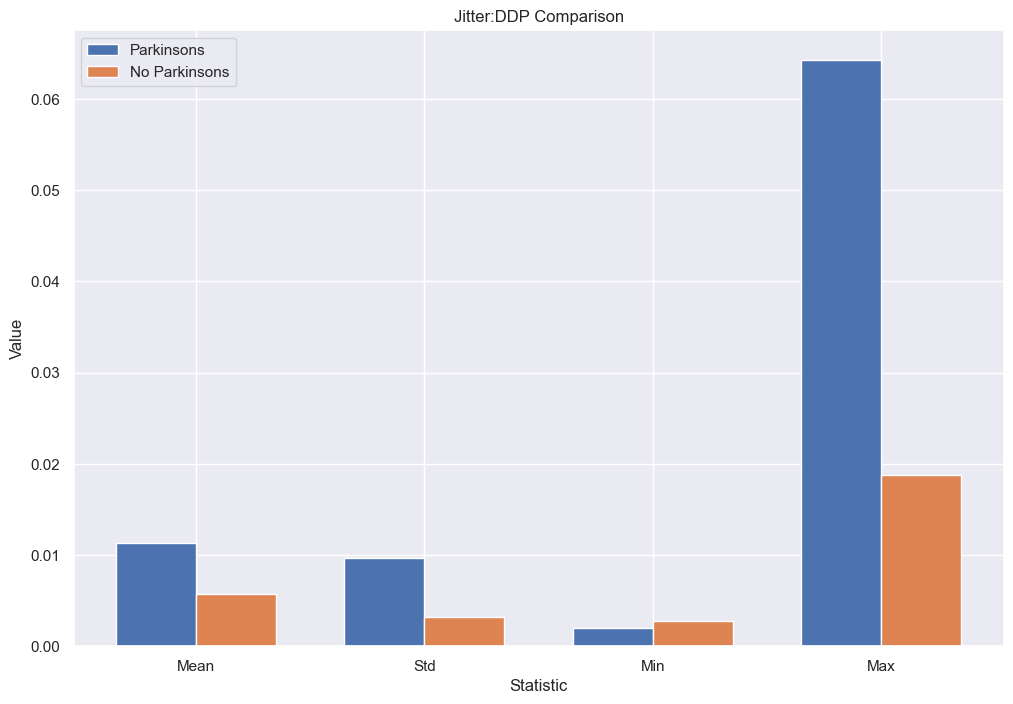

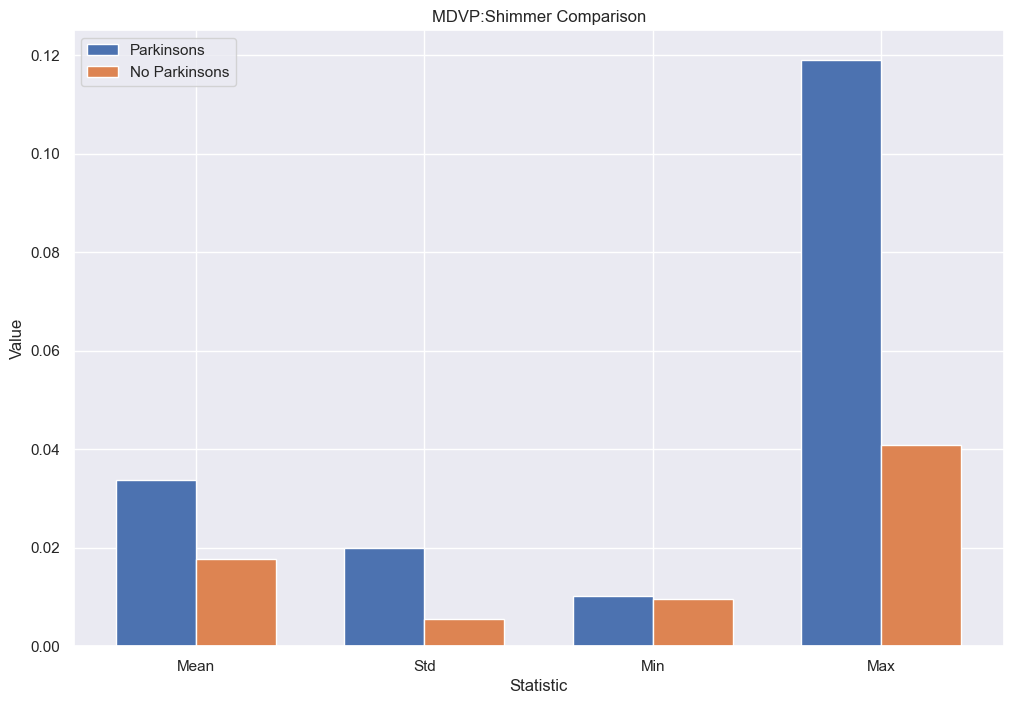

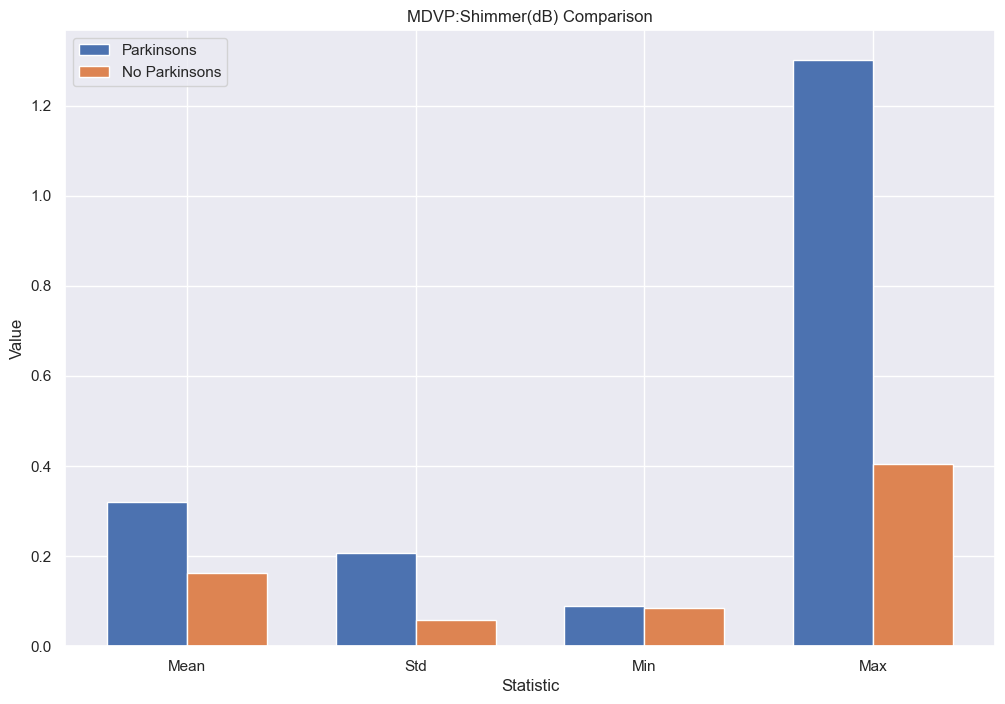

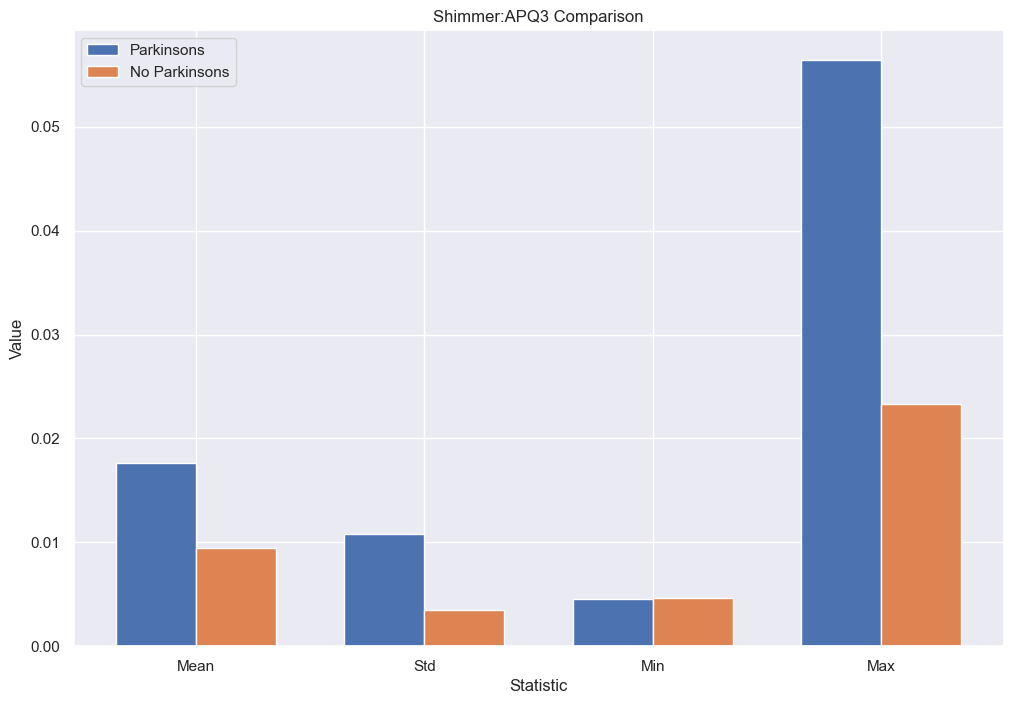

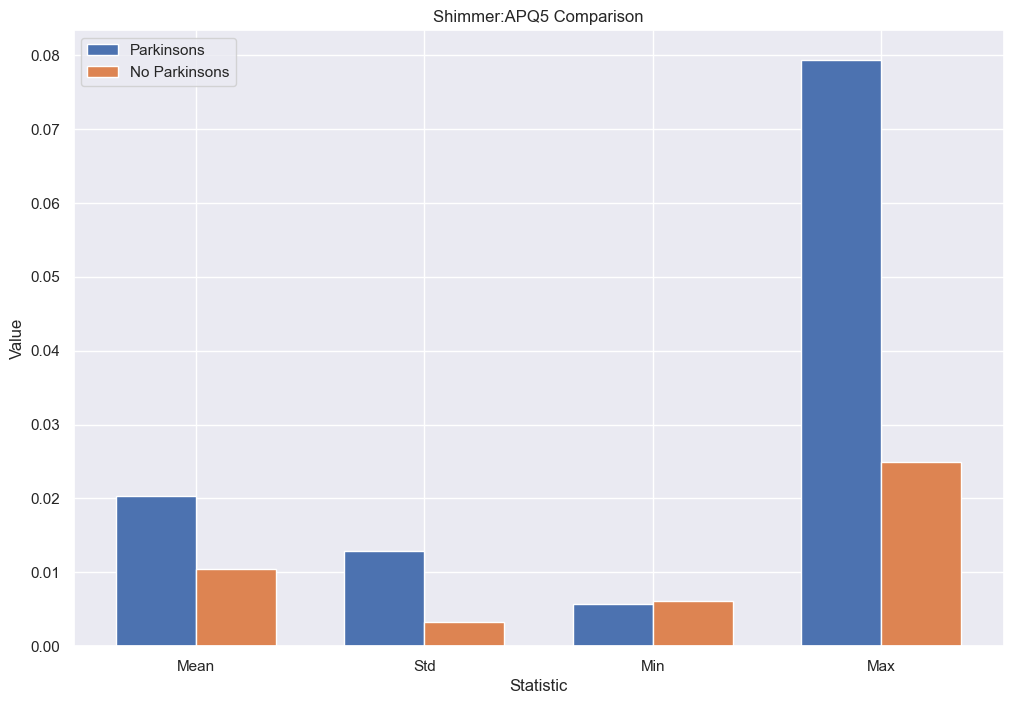

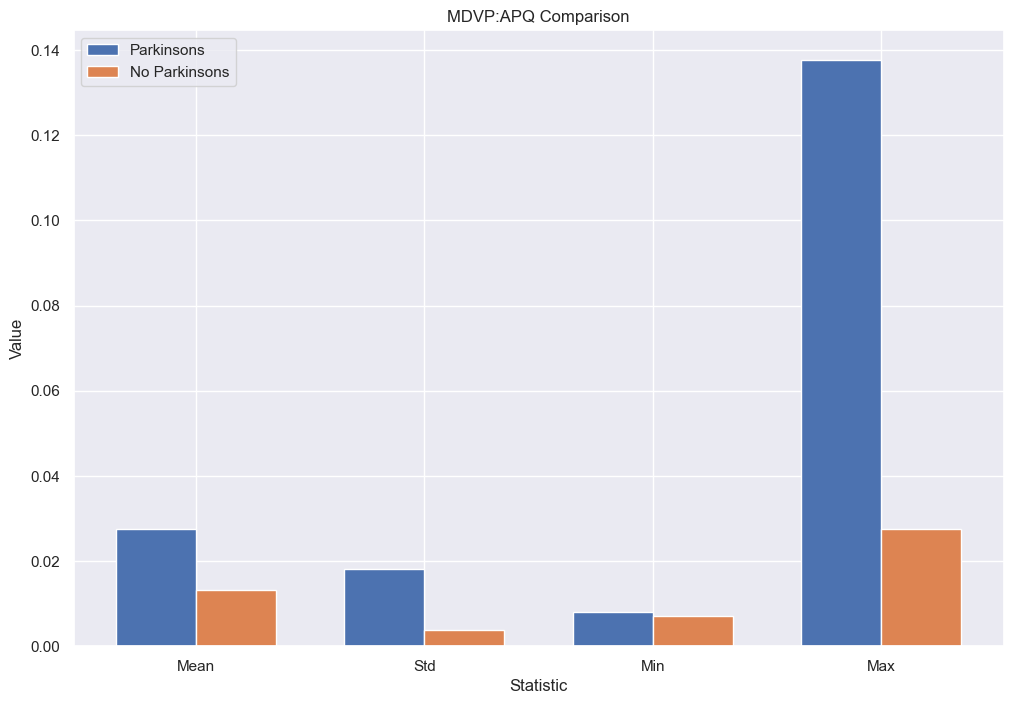

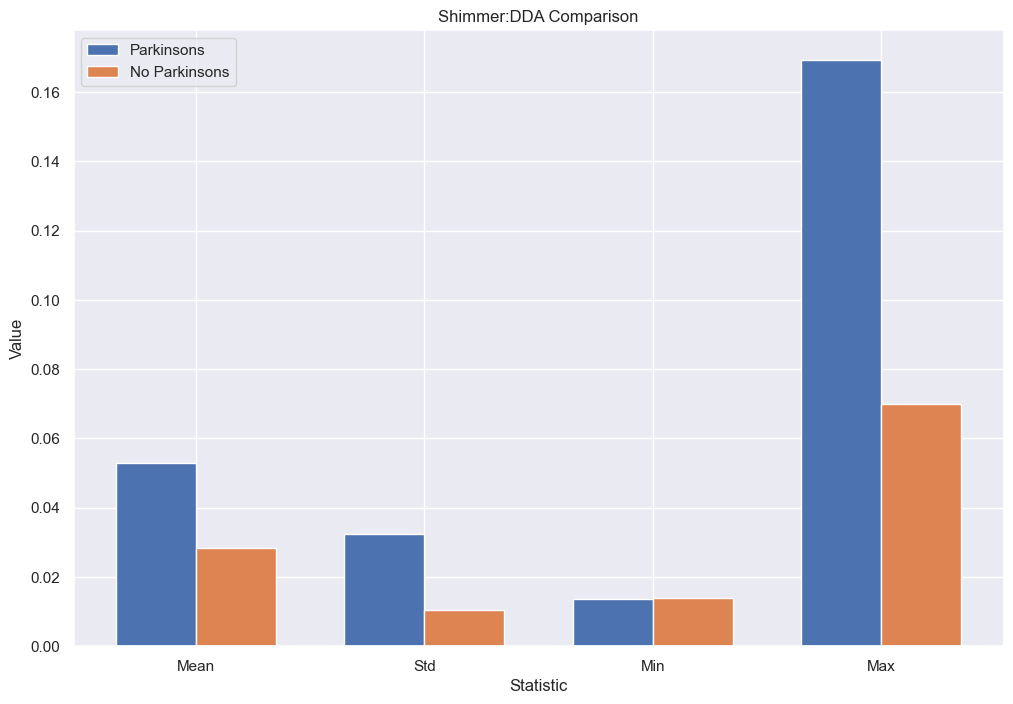

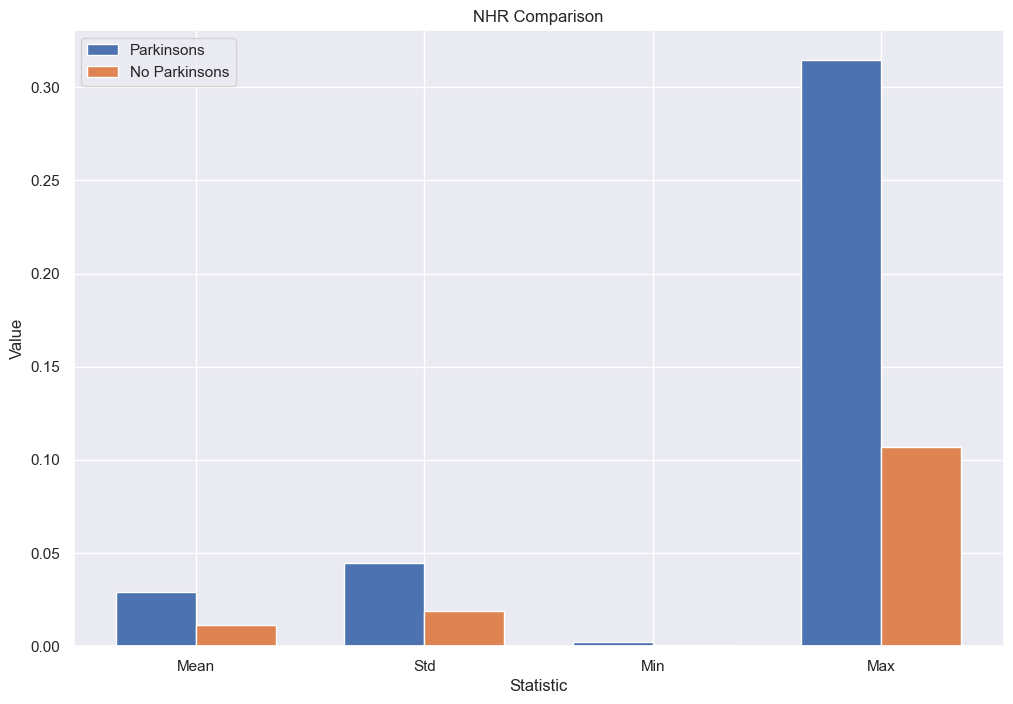

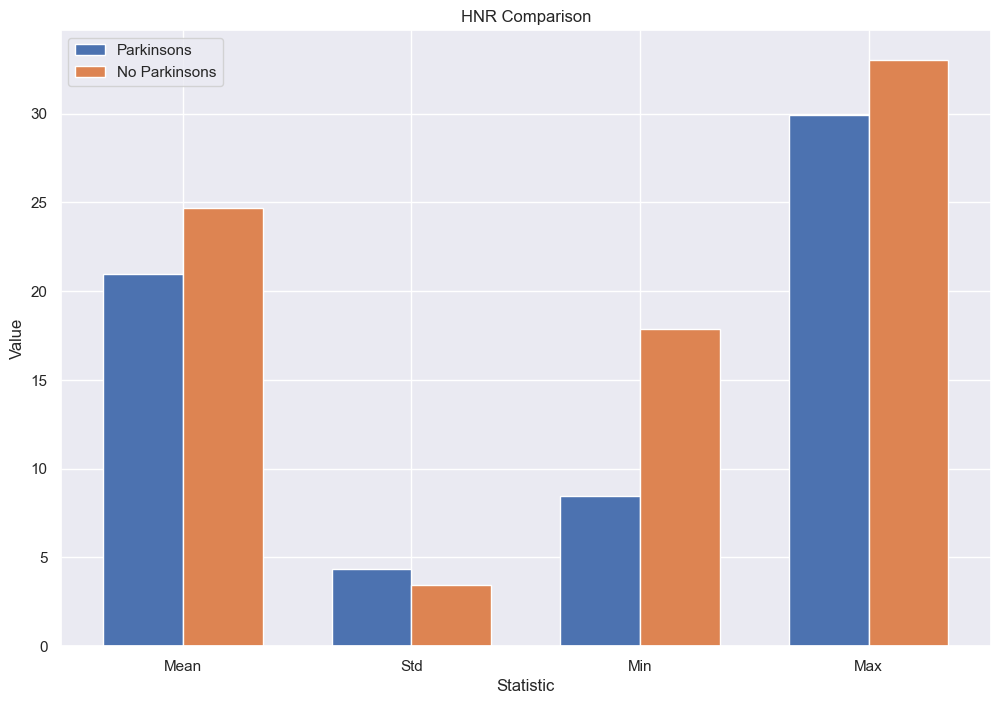

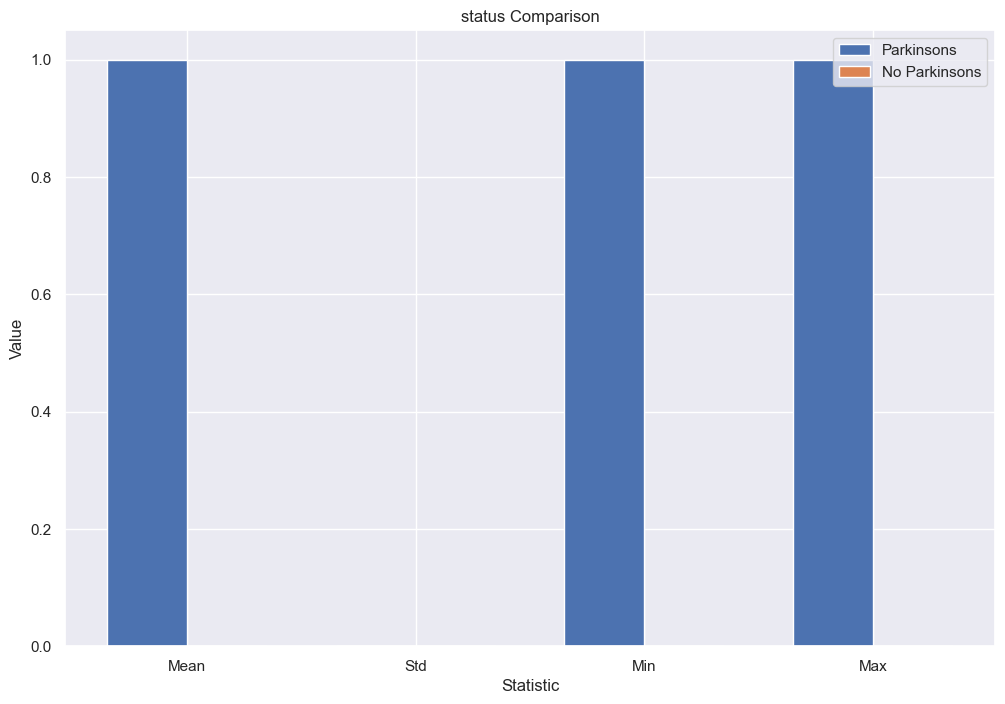

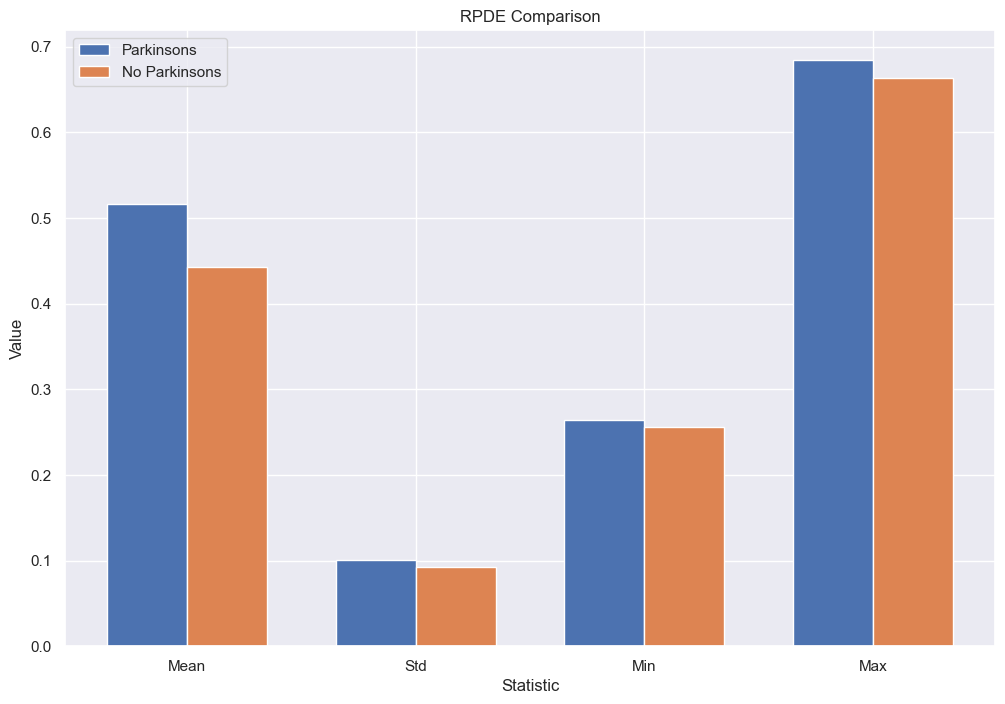

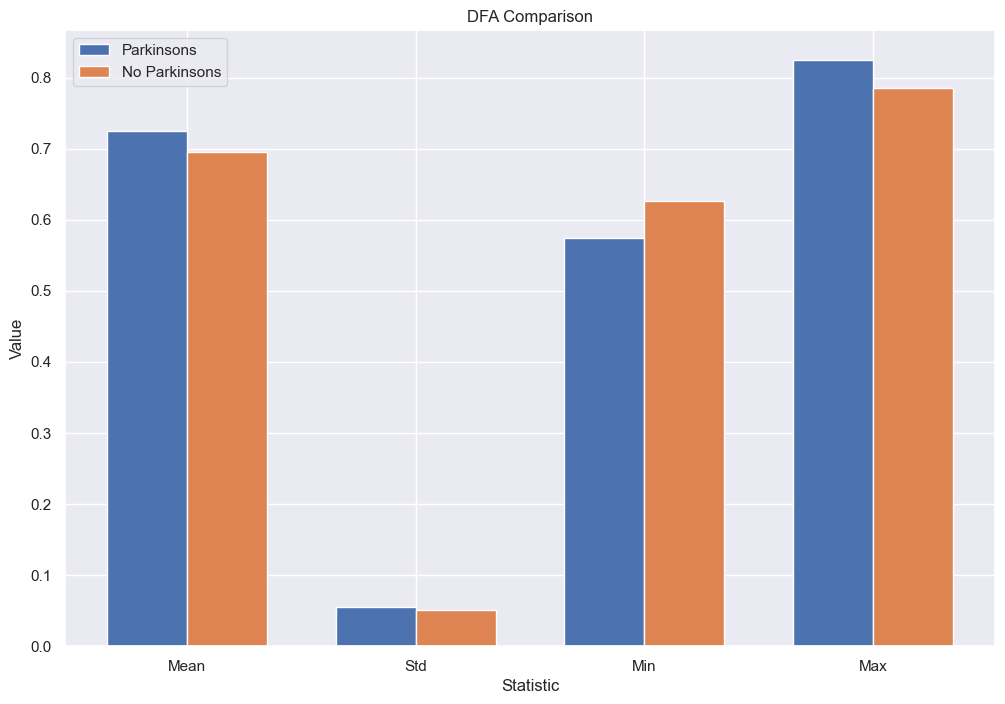

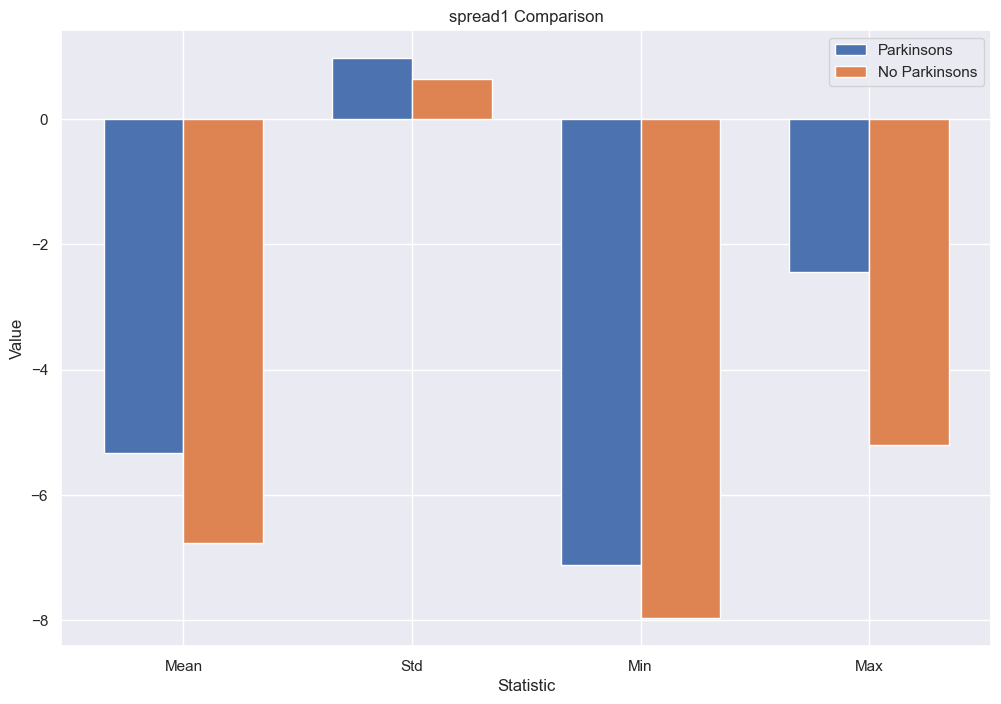

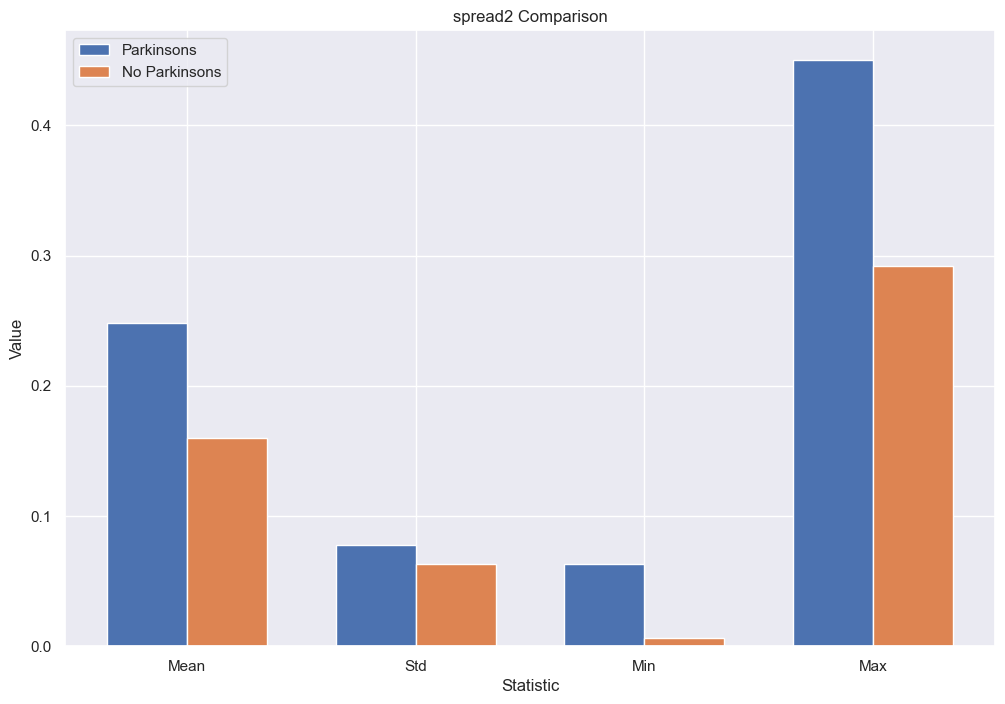

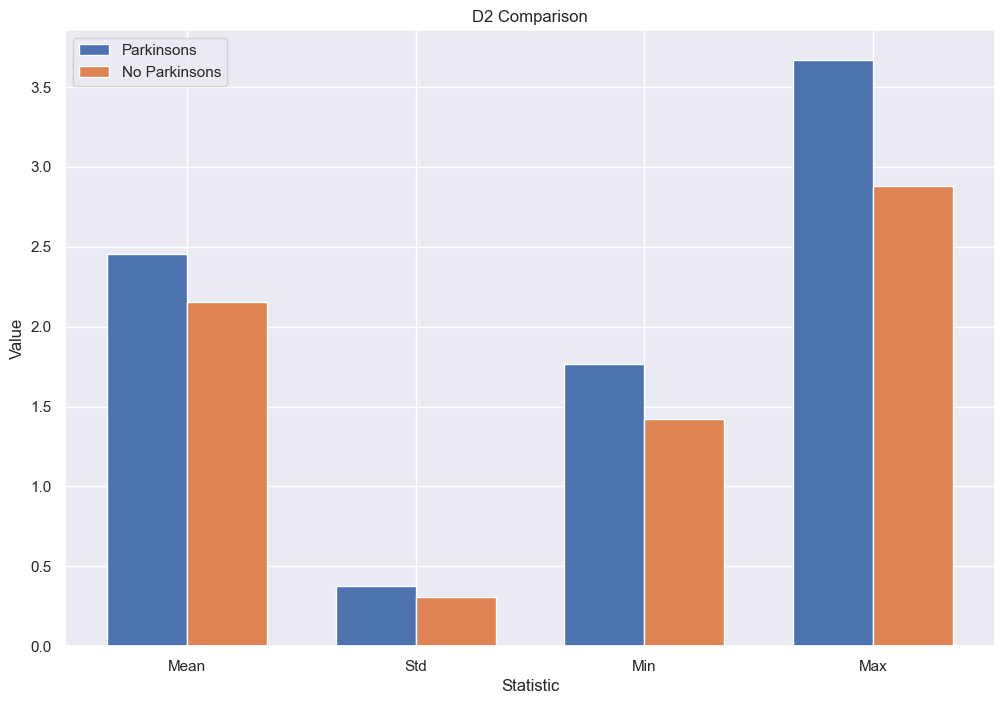

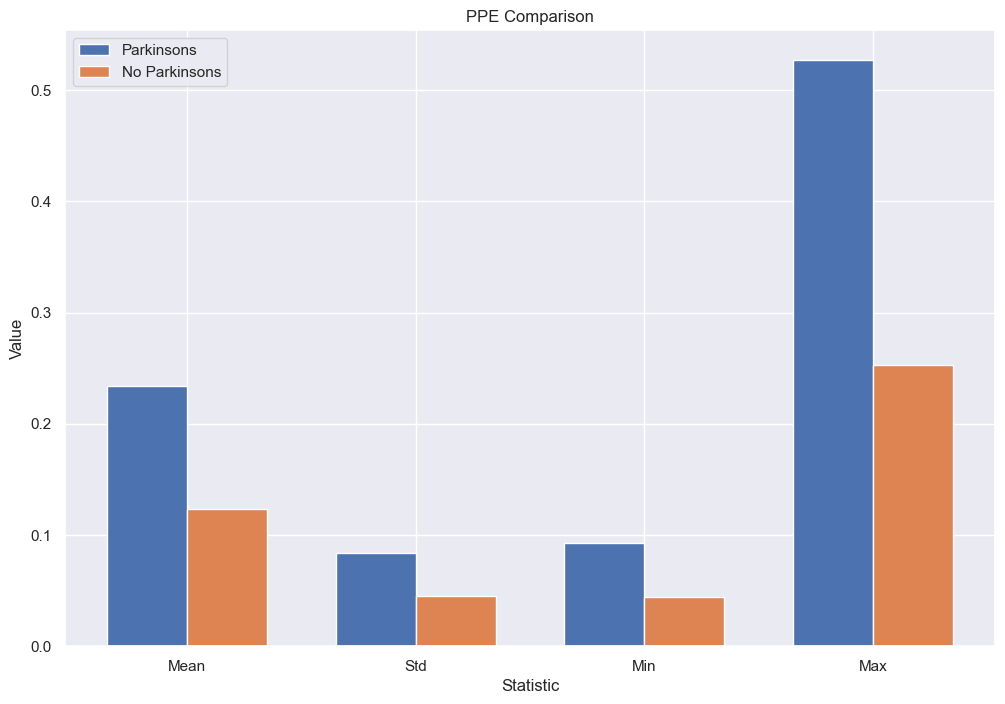

In [70]:
import matplotlib.pyplot as plt

# Set the labels for the x-axis
labels = ['Mean', 'Std', 'Min', 'Max']

# Create a list of the column names to iterate over
#cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
cols = desc_parkinsons.columns

# Set the width of the bars
width = 0.35

# Set the positions of the bars on the x-axis
positions1 = [0, 1, 2, 3]
positions2 = [x + width for x in positions1]

# Iterate over the columns and create the bar chart for each one
for col in cols:
    # Set the values for the y-axis
    values1 = desc_parkinsons[col].values
    values2 = desc_no_parkinsons[col].values
    
    # Create the bar chart
    plt.bar(positions1, values1, width, label='Parkinsons')
    plt.bar(positions2, values2, width, label='No Parkinsons')
    
    # Add labels to the chart
    plt.title(col + ' Comparison')
    plt.xlabel('Statistic')
    plt.ylabel('Value')
    plt.xticks([x + width / 2 for x in positions1], labels)
    
    # Add a legend to the chart
    plt.legend()
    
    # Show the chart
    plt.show()



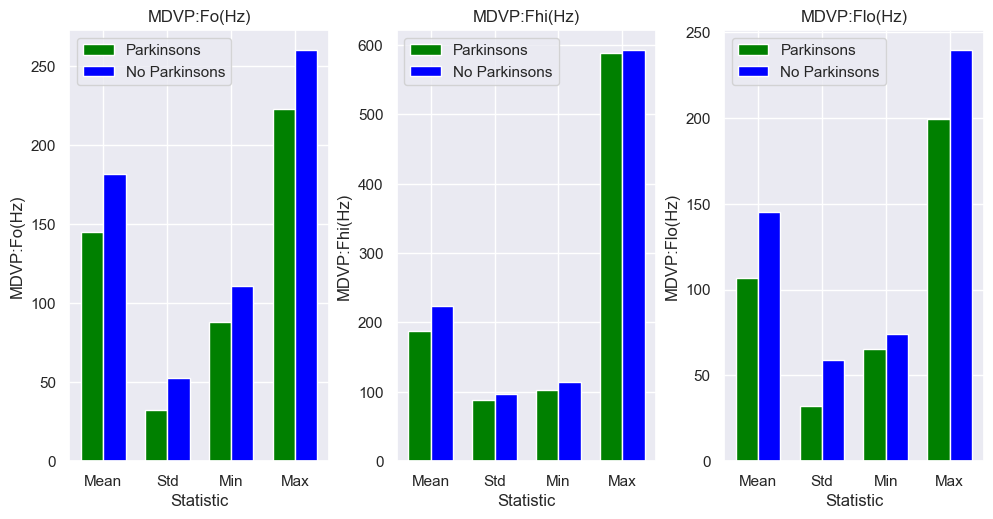

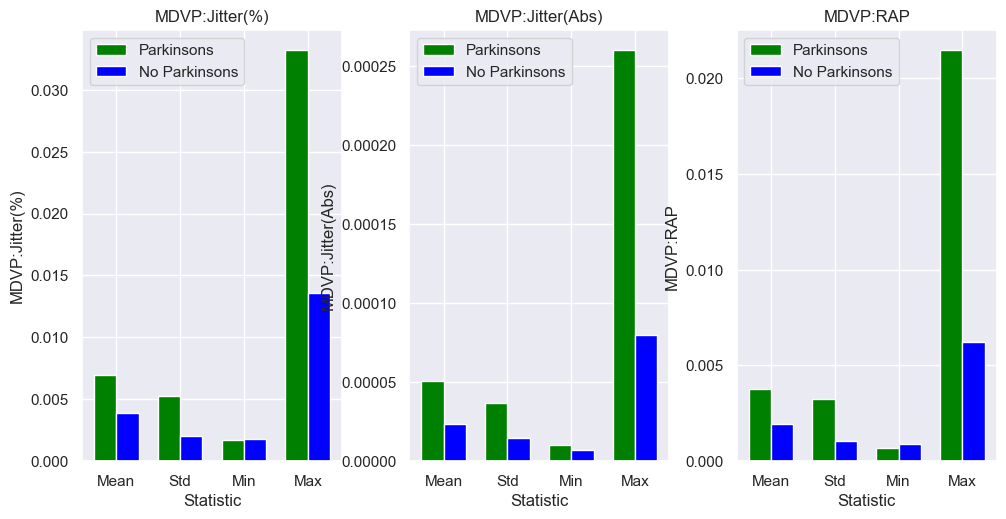

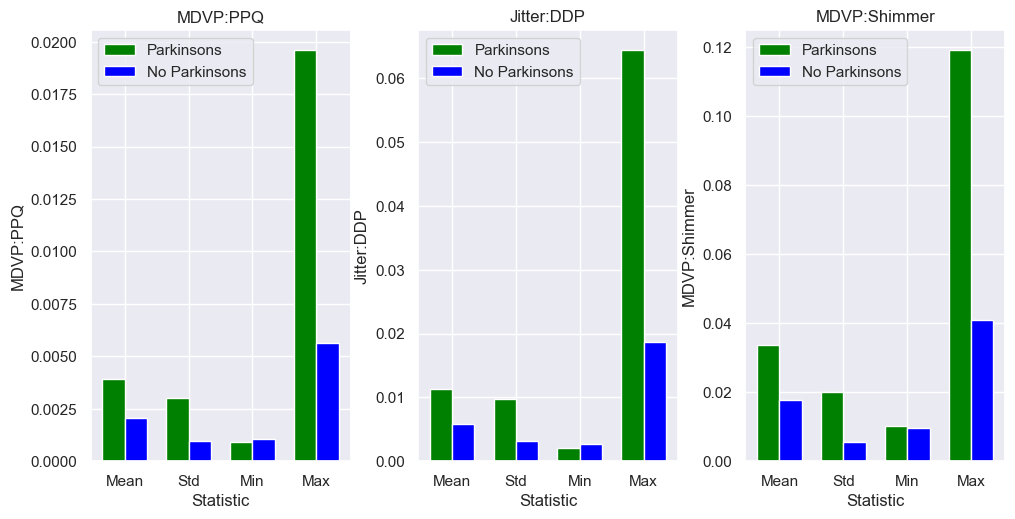

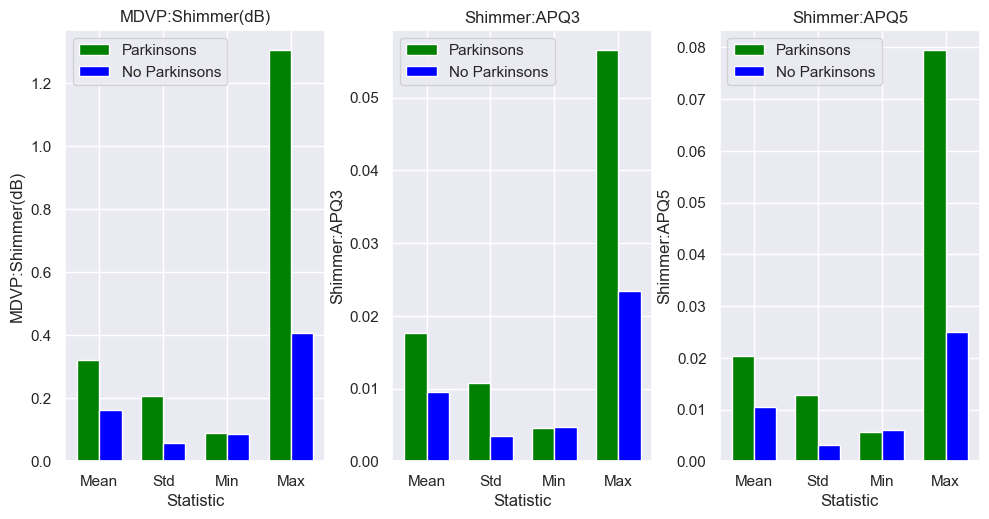

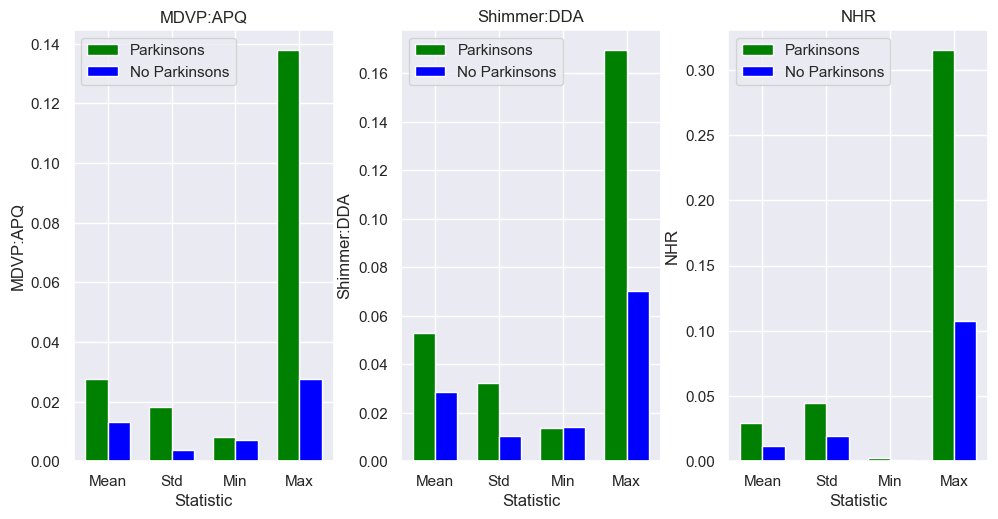

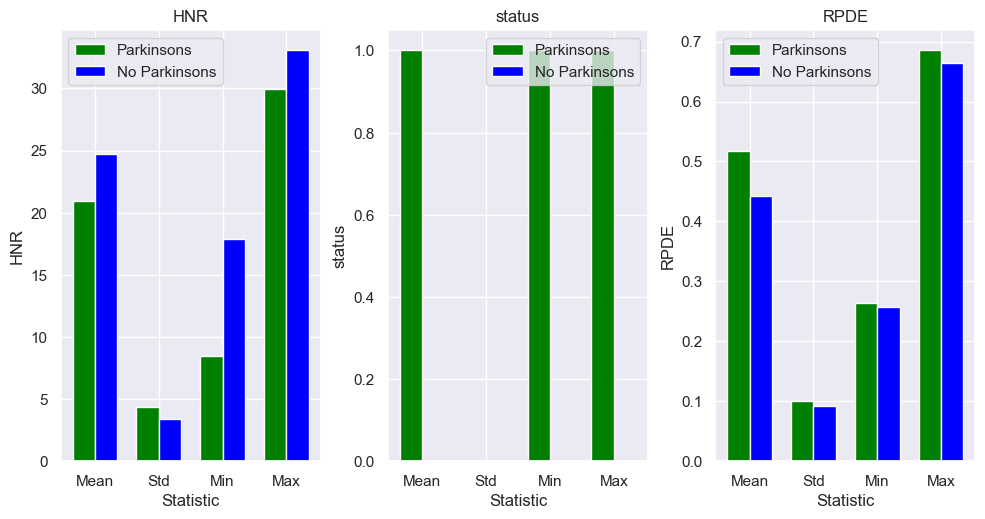

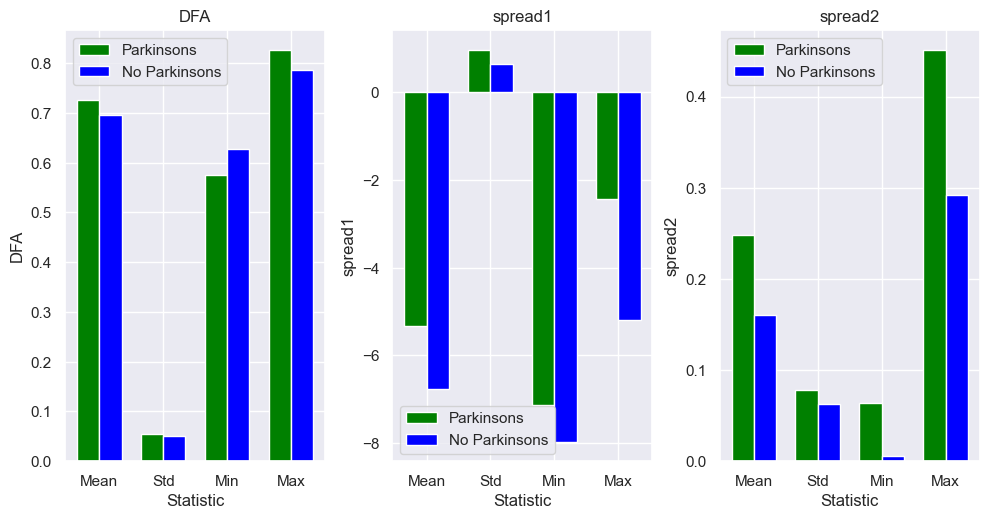

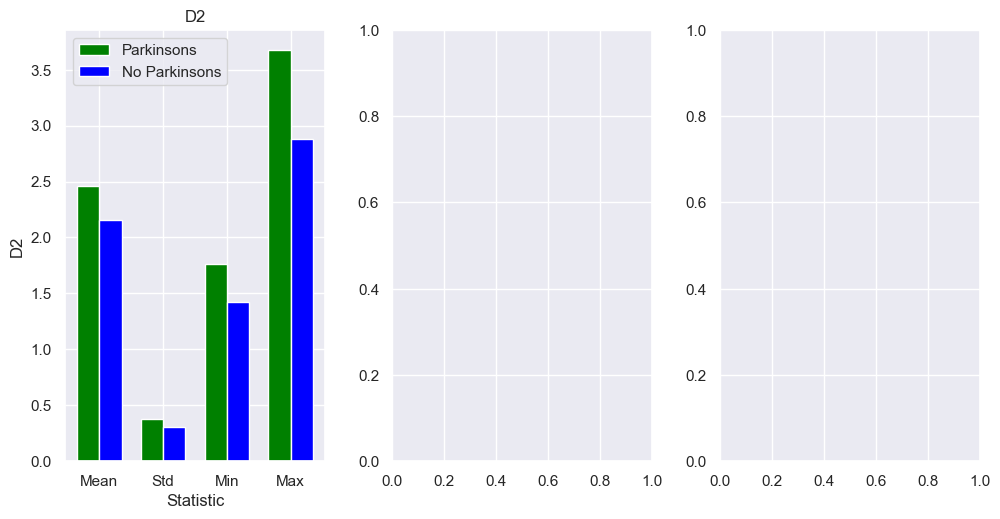

In [75]:
import matplotlib.pyplot as plt

# Set the labels for the x-axis
labels = ['Mean', 'Std', 'Min', 'Max']

# Get the column names
cols = desc_parkinsons.columns[:-1]
#cols = parkinsons_df.columns[:-1]

# Set the width of the bars
width = 0.35

# Set the positions of the bars on the x-axis
positions1 = [0, 1, 2, 3]
positions2 = [x + width for x in positions1]

# Initialize the counter
count = 0

# Loop through each column
for col in cols:
    # Get the values for the two groups
    values1 = desc_parkinsons[col].values
    values2 = desc_no_parkinsons[col].values

    # Check if the counter is a multiple of 3
    if count % 3 == 0:
        # Create a new figure with 3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(10, 5))
        fig.tight_layout()

    # Add the subplot to the current figure
    ax = axs[count % 3]

    # Create the bar chart
    ax.bar(positions1, values1, width, label='Parkinsons', color='green')
    ax.bar(positions2, values2, width, label='No Parkinsons', color='blue')

    # Add labels to the chart
    ax.set_title(col)
    ax.set_xlabel('Statistic')
    ax.set_ylabel(col)
    ax.set_xticks([x + width / 2 for x in positions1])
    ax.set_xticklabels(labels)

    # Add a legend to the chart
    ax.legend()

    # Increment the counter
    count += 1

    # Show the chart if the counter is a multiple of 3 or if it's the last column
    if count % 3 == 0 or col == cols[-1]:
        plt.show()


MDVP:Fo(Hz): p-value=0.0000


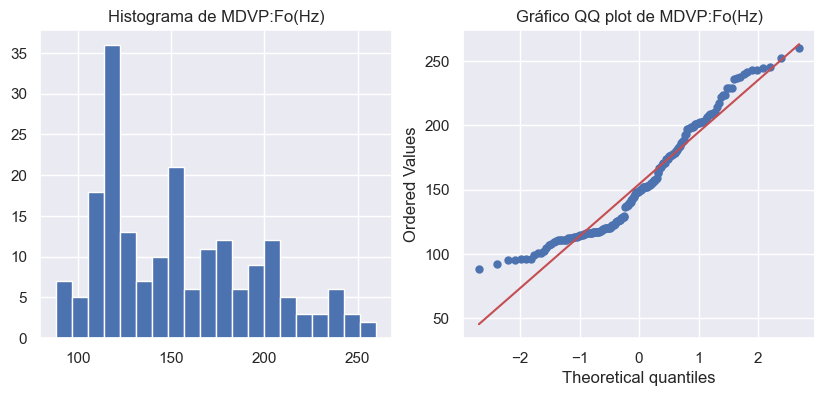

MDVP:Fhi(Hz): p-value=0.0000


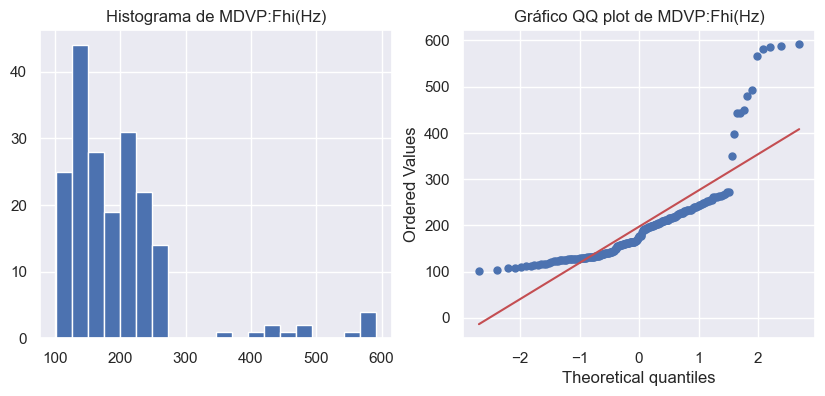

MDVP:Flo(Hz): p-value=0.0000


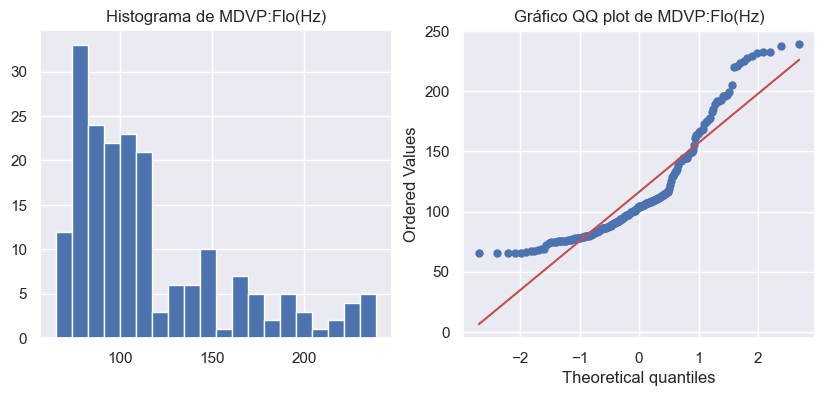

MDVP:Jitter(%): p-value=0.0000


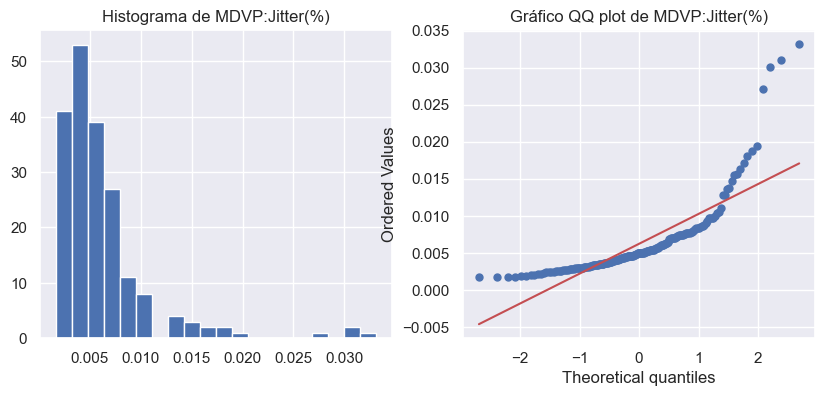

MDVP:Jitter(Abs): p-value=0.0000


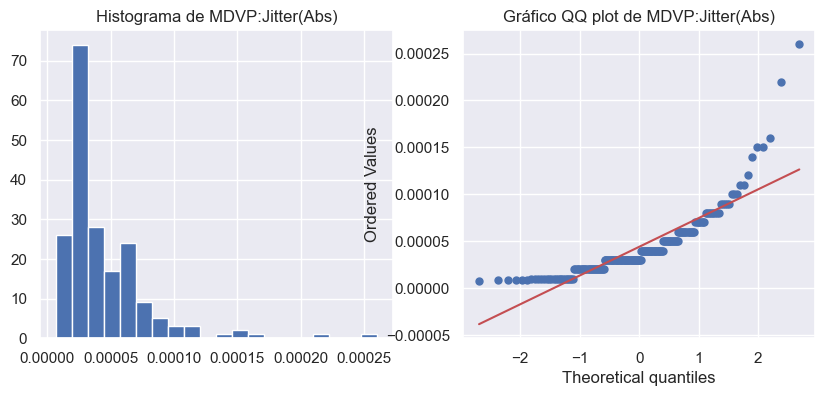

MDVP:RAP: p-value=0.0000


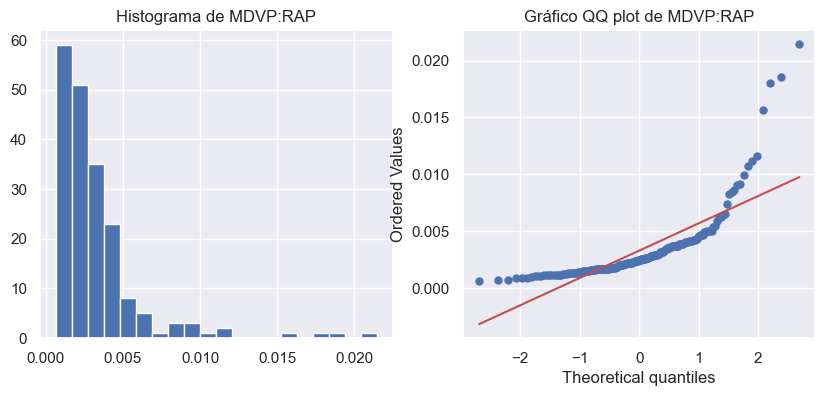

MDVP:PPQ: p-value=0.0000


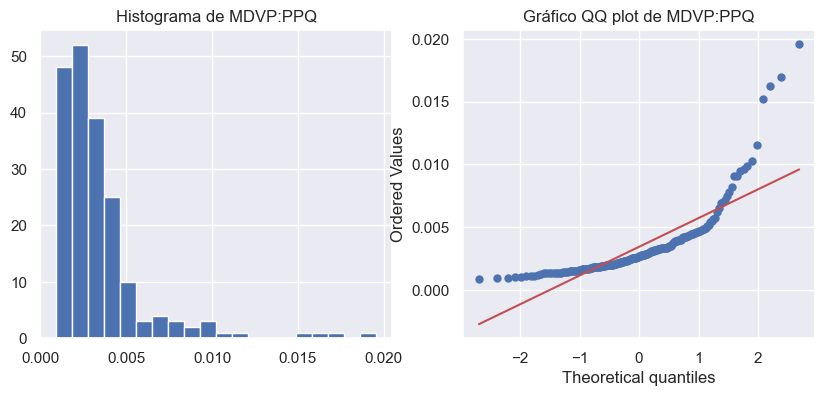

Jitter:DDP: p-value=0.0000


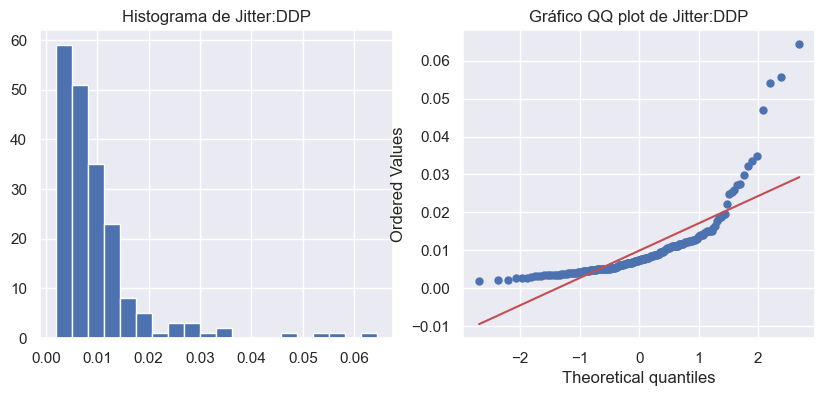

MDVP:Shimmer: p-value=0.0000


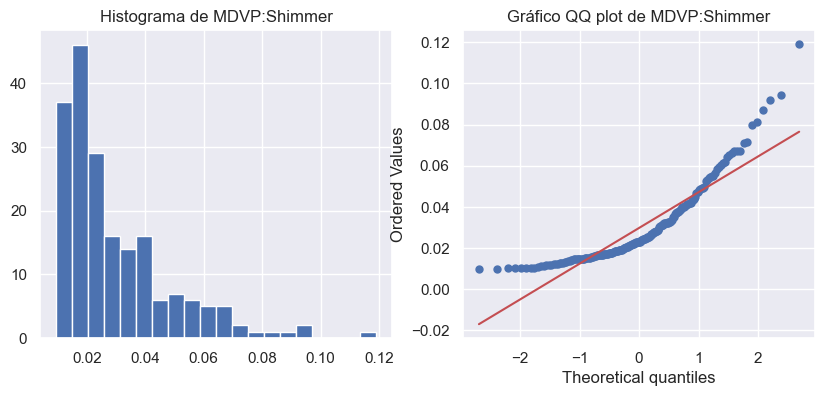

MDVP:Shimmer(dB): p-value=0.0000


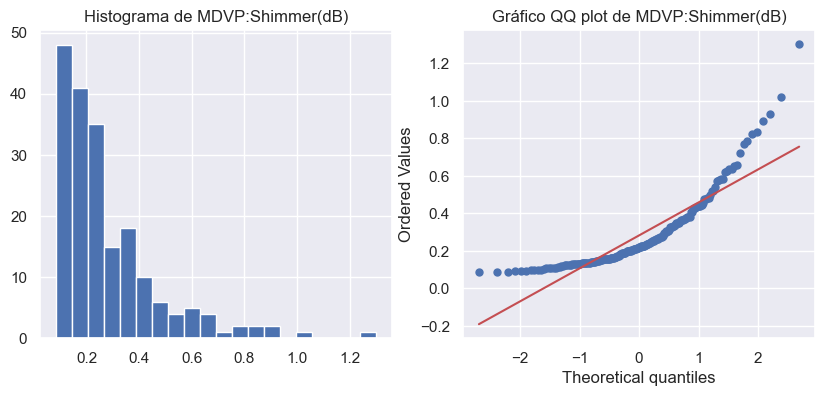

Shimmer:APQ3: p-value=0.0000


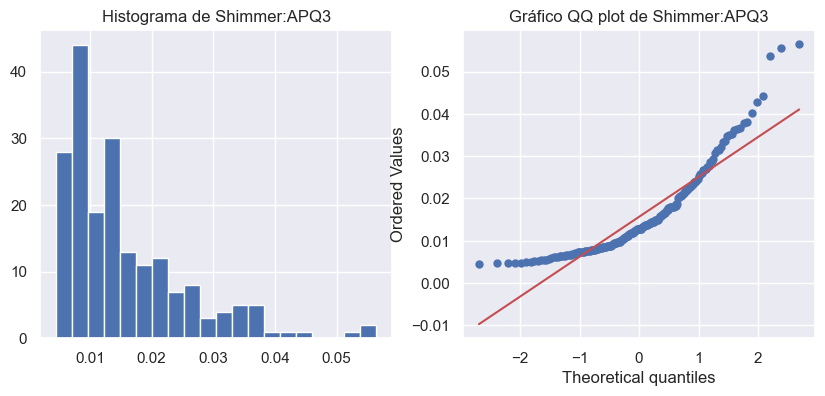

Shimmer:APQ5: p-value=0.0000


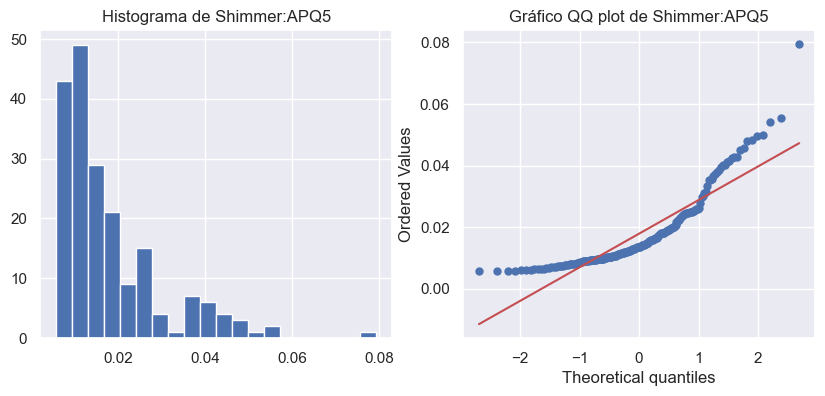

MDVP:APQ: p-value=0.0000


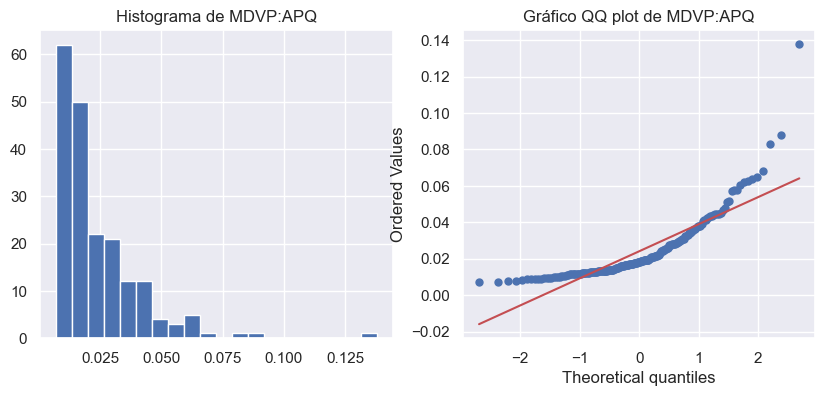

Shimmer:DDA: p-value=0.0000


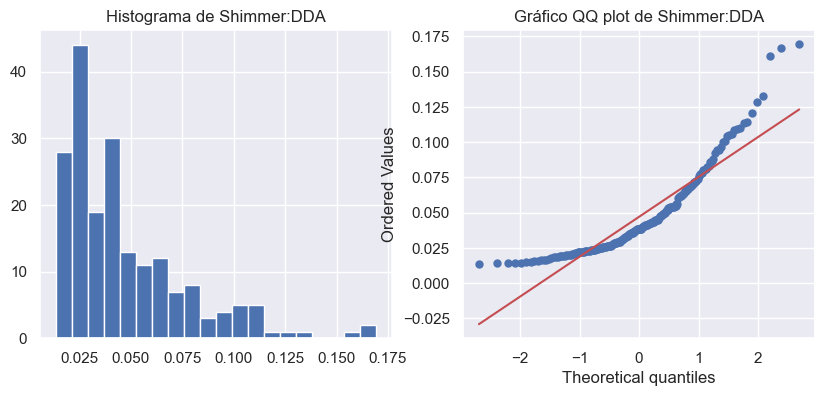

NHR: p-value=0.0000


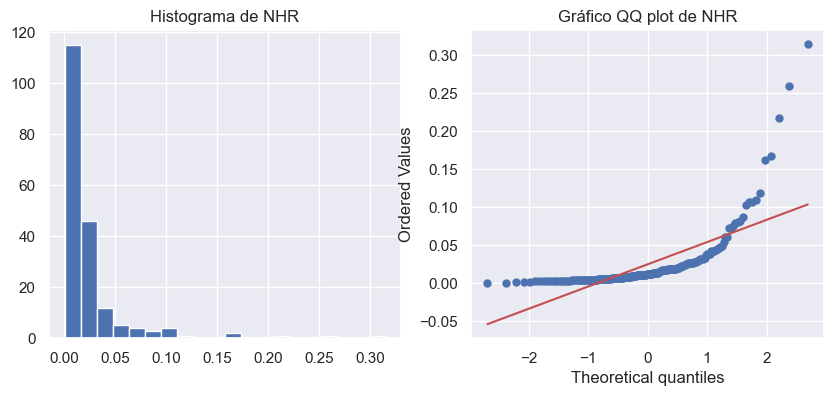

HNR: p-value=0.0006


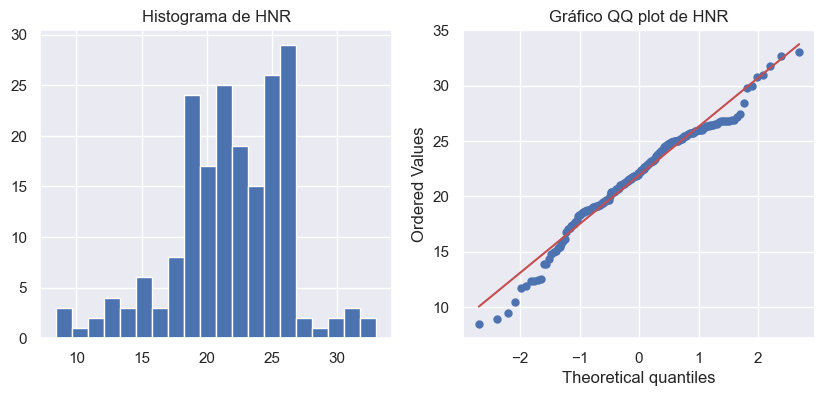

status: p-value=0.0000


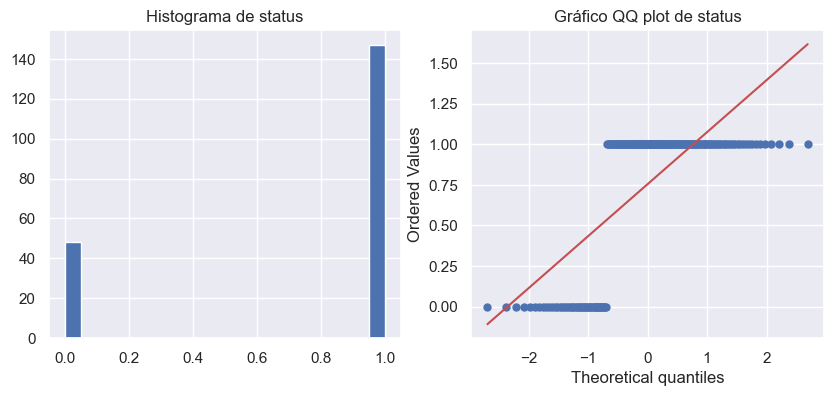

RPDE: p-value=0.0006


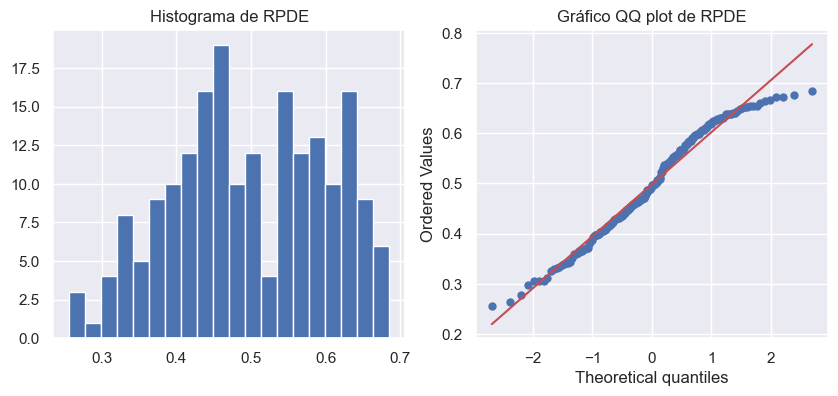

DFA: p-value=0.0143


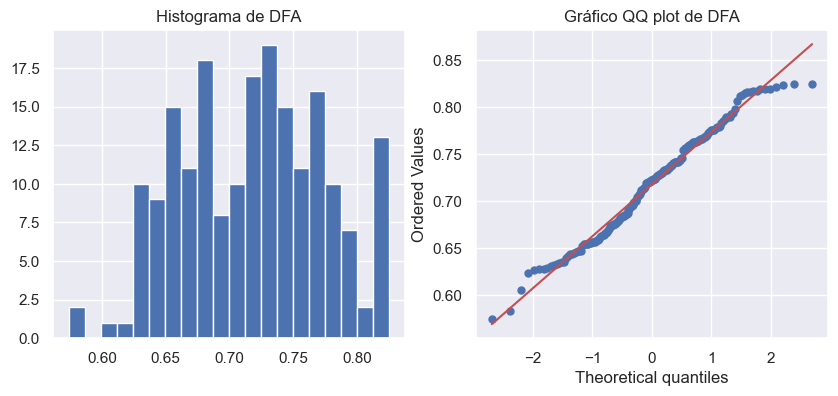

spread1: p-value=0.0257


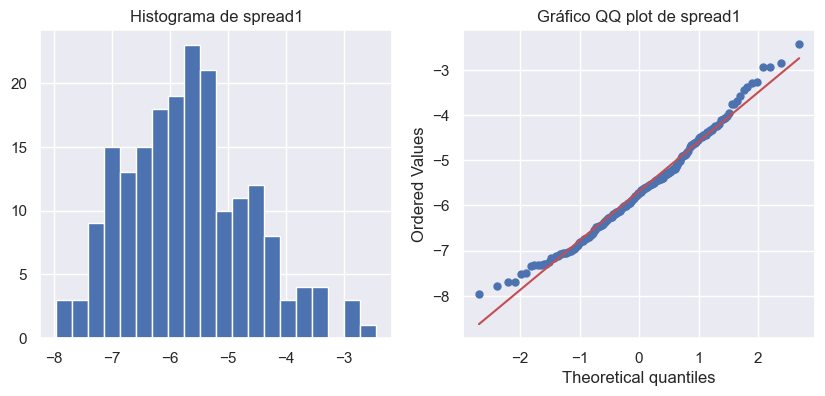

spread2: p-value=0.6545


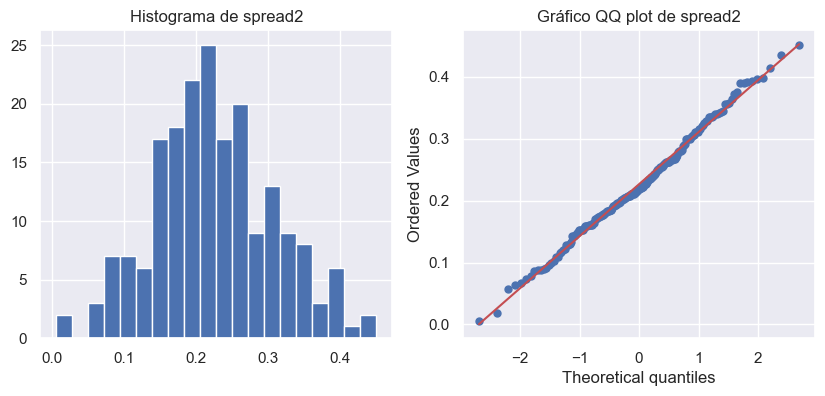

D2: p-value=0.0427


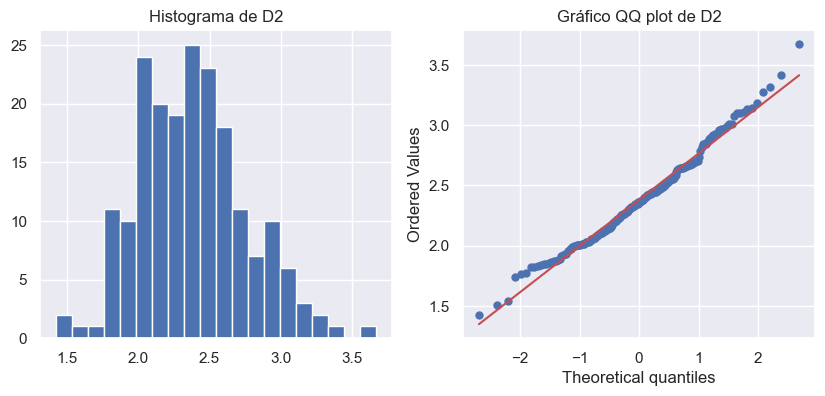

PPE: p-value=0.0000


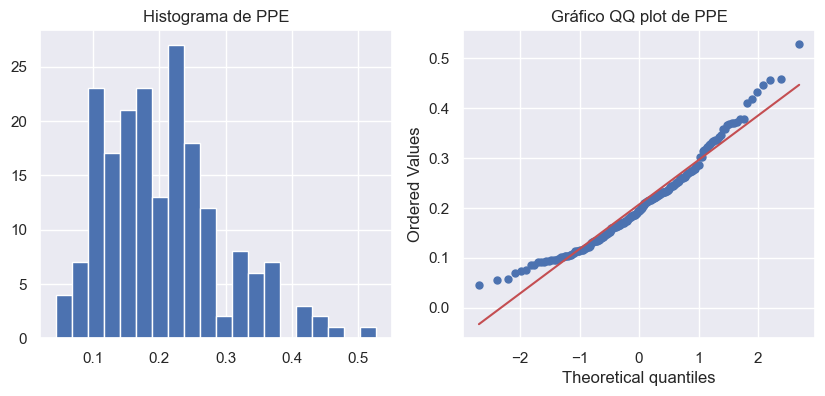

In [93]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Carrega os dados do arquivo CSV
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove a coluna "name"
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Loop através de todas as colunas do dataframe
for col in parkinsons_df.columns:
    # Converte os valores da coluna para float, com tratamento de erros
    parkinsons_df[col] = pd.to_numeric(parkinsons_df[col], errors='coerce')
    parkinsons_df = parkinsons_df.dropna(subset=[col])
    
    # Teste de normalidade Shapiro-Wilk
    stat, p = stats.shapiro(parkinsons_df[col])
    print(f'{col}: p-value={p:.4f}')
    
    # Cria o histograma e o gráfico QQ Plot da coluna
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    ax[0].hist(parkinsons_df[col], bins=20)
    ax[0].set_title(f'Histograma de {col}')
    stats.probplot(parkinsons_df[col], plot=ax[1])
    ax[1].set_title(f'Gráfico QQ plot de {col}')
    ax[1].get_lines()[0].set_markerfacecolor('C0')
    ax[1].get_lines()[0].set_markersize(5)
    plt.show()

In [94]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Carrega os dados do arquivo CSV
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove a coluna "name"
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Cria as listas para armazenar os valores t e p de cada coluna
cols = parkinsons_df.columns.tolist()
t_values = []
p_values = []

# Loop através de todas as colunas do dataframe
for col in cols:
    # Divide os dados em dois grupos de acordo com o valor da coluna "status"
    group_0 = parkinsons_df[parkinsons_df['status'] == 0][col]
    group_1 = parkinsons_df[parkinsons_df['status'] == 1][col]
    
    # Executa o teste t de Student para os dois grupos
    t, p = stats.ttest_ind(group_0, group_1)
    t_values.append(t)
    p_values.append(p)
    
# Cria um dataframe com os valores t e p de cada coluna
results_df = pd.DataFrame({'Coluna': cols, 't-value': t_values, 'p-value': p_values})

# Cria a tabela em formato markdown
table = '|Coluna|t-value|p-value|\n'
table += '|---|---|---|\n'
for i, row in results_df.iterrows():
    table += f'|{row["Coluna"]}|{row["t-value"]:.4f}|{row["p-value"]:.4f}|\n'

# Apresenta a tabela no Jupyter Notebook
display(Markdown(table))


C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\75423181.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(group_0, group_1)


|Coluna|t-value|p-value|
|---|---|---|
|MDVP:Fo(Hz)|5.7695|0.0000|
|MDVP:Fhi(Hz)|2.3406|0.0203|
|MDVP:Flo(Hz)|5.7108|0.0000|
|MDVP:Jitter(%)|-4.0240|0.0001|
|MDVP:Jitter(Abs)|-5.0002|0.0000|
|MDVP:RAP|-3.8439|0.0002|
|MDVP:PPQ|-4.1891|0.0000|
|Jitter:DDP|-3.8435|0.0002|
|MDVP:Shimmer|-5.4884|0.0000|
|MDVP:Shimmer(dB)|-5.2024|0.0000|
|Shimmer:APQ3|-5.1504|0.0000|
|Shimmer:APQ5|-5.2101|0.0000|
|MDVP:APQ|-5.4347|0.0000|
|Shimmer:DDA|-5.1503|0.0000|
|NHR|-2.6802|0.0080|
|HNR|5.3866|0.0000|
|status|-inf|0.0000|
|RPDE|-4.5067|0.0000|
|DFA|-3.3095|0.0011|
|spread1|-9.5092|0.0000|
|spread2|-7.0953|0.0000|
|D2|-5.0265|0.0000|
|PPE|-8.7065|0.0000|


In [95]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Carrega os dados do arquivo CSV
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove a coluna "name"
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Define o nível de significância
alpha = 0.05

# Loop através de todas as colunas do dataframe
results = []
for col in parkinsons_df.columns:
    # Separa os valores da coluna em dois grupos, com base no status
    group_1 = parkinsons_df[parkinsons_df['status'] == 1][col]
    group_2 = parkinsons_df[parkinsons_df['status'] == 0][col]
    
    # Teste t de Student independente
    stat, p = stats.ttest_ind(group_1, group_2)
    
    # Verifica se a hipótese nula foi rejeitada ou não
    reject_null = 'Sim' if p < alpha else 'Não'
    
    # Armazena os resultados em uma lista
    results.append([col, stat, p, reject_null])

# Cria a tabela com os resultados
headers = ['Variável', 'Estatística do teste t', 'Valor p', 'Hipótese nula rejeitada?']
table = tabulate(results, headers=headers, tablefmt='pipe')

# Exibe a tabela no Jupyter Notebook
print(table)


| Variável         |   Estatística do teste t |     Valor p | Hipótese nula rejeitada?   |
|:-----------------|-------------------------:|------------:|:---------------------------|
| MDVP:Fo(Hz)      |                 -5.76945 | 3.12192e-08 | Sim                        |
| MDVP:Fhi(Hz)     |                 -2.34057 | 0.0202757   | Sim                        |
| MDVP:Flo(Hz)     |                 -5.71077 | 4.197e-08   | Sim                        |
| MDVP:Jitter(%)   |                  4.02403 | 8.20999e-05 | Sim                        |
| MDVP:Jitter(Abs) |                  5.00017 | 1.28225e-06 | Sim                        |
| MDVP:RAP         |                  3.84386 | 0.000164339 | Sim                        |
| MDVP:PPQ         |                  4.1891  | 4.25777e-05 | Sim                        |
| Jitter:DDP       |                  3.84352 | 0.000164547 | Sim                        |
| MDVP:Shimmer     |                  5.48841 | 1.2647e-07  | Sim                        |

C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\2895415682.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p = stats.ttest_ind(group_1, group_2)


In [96]:
import pandas as pd
from scipy import stats
import numpy as np

# Carrega os dados do arquivo CSV
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove a coluna "name"
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Define os grupos para comparar
group_0 = parkinsons_df[parkinsons_df['status'] == 0]
group_1 = parkinsons_df[parkinsons_df['status'] == 1]

# Lista para guardar os resultados
results = []

# Loop através de todas as colunas do dataframe
for col in parkinsons_df.columns:
    # Converte os valores da coluna para float, com tratamento de erros
    parkinsons_df[col] = pd.to_numeric(parkinsons_df[col], errors='coerce')
    parkinsons_df = parkinsons_df.dropna(subset=[col])
    
    # Realiza o teste t de Student
    t_stat, p_val = stats.ttest_ind(group_0[col], group_1[col], equal_var=False)
    
    # Define os níveis de significância a serem considerados
    alpha_levels = [0.001, 0.005, 0.01, 0.02, 0.05]
    
    # Verifica se o valor-p é menor que cada nível de significância
    sig_levels = [p_val < alpha for alpha in alpha_levels]
    
    # Cria a lista com os resultados
    results.append([col, round(t_stat, 3), round(p_val, 4), sig_levels])
    
# Cria o dataframe com os resultados
results_df = pd.DataFrame(results, columns=['Variável', 't-valor', 'p-valor', 'Significância'])

# Cria a tabela LaTeX
table_latex = results_df.to_latex(index=False, escape=False)

# Imprime a tabela LaTeX
print(table_latex)

# Imprime a tabela com a indicação de diferença significativa para cada nível de significância
for i, row in results_df.iterrows():
    print(row['Variável'])
    print(row['Significância'])
    print('')


\begin{tabular}{lrrl}
\toprule
        Variável &  t-valor &  p-valor &                      Significância \\
\midrule
     MDVP:Fo(Hz) &    4.558 &   0.0000 &     [True, True, True, True, True] \\
    MDVP:Fhi(Hz) &    2.235 &   0.0284 & [False, False, False, False, True] \\
    MDVP:Flo(Hz) &    4.310 &   0.0001 &     [True, True, True, True, True] \\
  MDVP:Jitter(%) &   -5.959 &   0.0000 &     [True, True, True, True, True] \\
MDVP:Jitter(Abs) &   -7.329 &   0.0000 &     [True, True, True, True, True] \\
        MDVP:RAP &   -5.941 &   0.0000 &     [True, True, True, True, True] \\
        MDVP:PPQ &   -6.535 &   0.0000 &     [True, True, True, True, True] \\
      Jitter:DDP &   -5.940 &   0.0000 &     [True, True, True, True, True] \\
    MDVP:Shimmer &   -8.761 &   0.0000 &     [True, True, True, True, True] \\
MDVP:Shimmer(dB) &   -8.301 &   0.0000 &     [True, True, True, True, True] \\
    Shimmer:APQ3 &   -8.006 &   0.0000 &     [True, True, True, True, True] \\
    Shimmer:

C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\3423016259.py:25: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(group_0[col], group_1[col], equal_var=False)
C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\3423016259.py:40: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_latex = results_df.to_latex(index=False, escape=False)


In [97]:
import pandas as pd
import scipy.stats as stats

# Carrega os dados do arquivo CSV
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove a coluna "name"
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Loop através de todas as colunas do dataframe
momentos = []
assimetrias = []
curtoses = []
for col in parkinsons_df.columns:
    # Converte os valores da coluna para float, com tratamento de erros
    parkinsons_df[col] = pd.to_numeric(parkinsons_df[col], errors='coerce')
    parkinsons_df = parkinsons_df.dropna(subset=[col])

    # Calcula os momentos, assimetria e curtose da coluna
    moment = stats.moment(parkinsons_df[col])
    skew = stats.skew(parkinsons_df[col])
    kurtosis = stats.kurtosis(parkinsons_df[col])
    momentos.append(round(moment, 2))
    assimetrias.append(round(skew, 2))
    curtoses.append(round(kurtosis, 2))

# Cria a tabela em formato LaTeX
tabela_latex = '\\begin{tabular}{|l|c|c|c|}\n'
tabela_latex += '\\hline\n'
tabela_latex += 'Variável & Momento & Assimetria & Curtose\\\\\n'
tabela_latex += '\\hline\n'
for i, col in enumerate(parkinsons_df.columns):
    tabela_latex += f'{col} & {momentos[i]} & {assimetrias[i]} & {curtoses[i]}\\\\\n'
tabela_latex += '\\hline\n'
tabela_latex += '\\end{tabular}'

print(tabela_latex)


\begin{tabular}{|l|c|c|c|}
\hline
Variável & Momento & Assimetria & Curtose\\
\hline
MDVP:Fo(Hz) & 0.0 & 0.59 & -0.64\\
MDVP:Fhi(Hz) & 0.0 & 2.52 & 7.4\\
MDVP:Flo(Hz) & 0.0 & 1.21 & 0.61\\
MDVP:Jitter(%) & 0.0 & 3.06 & 11.69\\
MDVP:Jitter(Abs) & 0.0 & 2.63 & 10.56\\
MDVP:RAP & 0.0 & 3.33 & 13.82\\
MDVP:PPQ & 0.0 & 3.05 & 11.63\\
Jitter:DDP & 0.0 & 3.34 & 13.83\\
MDVP:Shimmer & 0.0 & 1.65 & 3.13\\
MDVP:Shimmer(dB) & 0.0 & 1.98 & 4.97\\
Shimmer:APQ3 & 0.0 & 1.57 & 2.62\\
Shimmer:APQ5 & 0.0 & 1.78 & 3.74\\
MDVP:APQ & 0.0 & 2.6 & 10.85\\
Shimmer:DDA & 0.0 & 1.57 & 2.62\\
NHR & 0.0 & 4.19 & 21.4\\
HNR & 0.0 & -0.51 & 0.57\\
status & 0.0 & -1.18 & -0.61\\
RPDE & 0.0 & -0.14 & -0.93\\
DFA & 0.0 & -0.03 & -0.7\\
spread1 & 0.0 & 0.43 & -0.08\\
spread2 & 0.0 & 0.14 & -0.11\\
D2 & 0.0 & 0.43 & 0.18\\
PPE & 0.0 & 0.79 & 0.48\\
\hline
\end{tabular}


In [98]:
import pandas as pd
from scipy import stats
import numpy as np

# Carrega os dados do arquivo CSV
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove a coluna "name"
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Define os grupos para comparar
group_0 = parkinsons_df[parkinsons_df['status'] == 0]
group_1 = parkinsons_df[parkinsons_df['status'] == 1]

# Lista para guardar os resultados
results = []

# Loop através de todas as colunas do dataframe
for col in parkinsons_df.columns:
    # Calcula a média e o desvio padrão de cada grupo
    group_0_mean = group_0[col].mean()
    group_1_mean = group_1[col].mean()
    group_0_std = group_0[col].std()
    group_1_std = group_1[col].std()

    # Calcula o tamanho de efeito d
    d = abs(group_0_mean - group_1_mean) / np.sqrt((group_0_std ** 2 + group_1_std ** 2) / 2)

    # Adiciona os resultados à lista
    results.append([col, d])

# Cria o dataframe com os resultados
results_df = pd.DataFrame(results, columns=['Variável', 'Tamanho de Efeito d'])

# Ordena os resultados por ordem decrescente de tamanho de efeito d
results_df = results_df.sort_values('Tamanho de Efeito d', ascending=False)

# Cria a tabela LaTeX
table_latex = results_df.to_latex(index=False, escape=False)

# Imprime a tabela LaTeX
print(table_latex)

\begin{tabular}{lr}
\toprule
        Variável &  Tamanho de Efeito d \\
\midrule
          status &                  inf \\
         spread1 &             1.731890 \\
             PPE &             1.641830 \\
         spread2 &             1.240948 \\
        MDVP:APQ &             1.095003 \\
    MDVP:Shimmer &             1.094700 \\
    Shimmer:APQ5 &             1.043650 \\
MDVP:Shimmer(dB) &             1.037554 \\
    Shimmer:APQ3 &             1.019441 \\
     Shimmer:DDA &             1.019409 \\
MDVP:Jitter(Abs) &             0.971997 \\
             HNR &             0.946751 \\
              D2 &             0.875214 \\
     MDVP:Fo(Hz) &             0.840288 \\
        MDVP:PPQ &             0.830007 \\
    MDVP:Flo(Hz) &             0.808261 \\
  MDVP:Jitter(%) &             0.784775 \\
            RPDE &             0.766932 \\
        MDVP:RAP &             0.759526 \\
      Jitter:DDP &             0.759448 \\
             DFA &             0.559241 \\
             NHR

C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\479762424.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  d = abs(group_0_mean - group_1_mean) / np.sqrt((group_0_std ** 2 + group_1_std ** 2) / 2)
C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\479762424.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_latex = results_df.to_latex(index=False, escape=False)


In [101]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the Parkinson's data
parkinsons_df = pd.read_csv('parkinsons.data')

# Remove the 'name' column
parkinsons_df = parkinsons_df.drop(columns=['name'])

# Create a results list
results = []

# Loop through all columns
for col in parkinsons_df.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(parkinsons_df[col], parkinsons_df['status'])

    # Run the chi-squared test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Create a list of the significance levels
    alpha_levels = [0.001, 0.005, 0.01, 0.02, 0.05]

    # Check if the p-value is less than each significance level
    sig_levels = [p_val < alpha for alpha in alpha_levels]

    # Add the results to the list
    results.append([col, round(chi2_stat, 3), round(p_val, 4), sig_levels])

# Create a results dataframe
results_df = pd.DataFrame(results, columns=['Variable', 'Chi-Squared', 'p-value', 'Significance'])

# Create the LaTeX table
table_latex = results_df.to_latex(index=False)

# Print the table
print(table_latex)


\begin{tabular}{lrrl}
\toprule
        Variable &  Chi-Squared &  p-value &                        Significance \\
\midrule
     MDVP:Fo(Hz) &      195.000 &   0.4663 & [False, False, False, False, False] \\
    MDVP:Fhi(Hz) &      195.000 &   0.4663 & [False, False, False, False, False] \\
    MDVP:Flo(Hz) &      195.000 &   0.4663 & [False, False, False, False, False] \\
  MDVP:Jitter(\%) &      172.546 &   0.4740 & [False, False, False, False, False] \\
MDVP:Jitter(Abs) &       67.725 &   0.0000 &      [True, True, True, True, True] \\
        MDVP:RAP &      150.810 &   0.5576 & [False, False, False, False, False] \\
        MDVP:PPQ &      159.971 &   0.5743 & [False, False, False, False, False] \\
      Jitter:DDP &      181.527 &   0.4332 & [False, False, False, False, False] \\
    MDVP:Shimmer &      184.222 &   0.5437 & [False, False, False, False, False] \\
MDVP:Shimmer(dB) &      135.900 &   0.7531 & [False, False, False, False, False] \\
    Shimmer:APQ3 &      189.611 &  

C:\Users\mbfigueredo\AppData\Local\Temp\ipykernel_21200\2382718680.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_latex = results_df.to_latex(index=False)
